# 🎯 Mục tiêu dự án với tập dữ liệu Amazon Sale Report
## 1. Mục tiêu tổng quát
Khai phá dữ liệu bán hàng để phát hiện các yếu tố ảnh hưởng đến trạng thái đơn hàng, doanh thu và hiệu suất giao hàng.

Dự đoán kết quả trong tương lai như: đơn hàng có bị hủy hay không, hoặc doanh thu của một đơn hàng.

Đề xuất giải pháp cải thiện hoạt động kinh doanh: tối ưu hóa vận chuyển, giảm đơn hàng bị hủy, tăng doanh thu.

## 2. Các câu hỏi nghiên cứu có thể đặt ra

📊 Phân tích mô tả	
- Sản phẩm nào bán chạy nhất?
- Thành phố nào có doanh số cao nhất?
- Tỷ lệ đơn hàng bị hủy là bao nhiêu?
- Những yếu tố nào thường xuất hiện trong các đơn bị hủy?

📈 Hồi quy	
- Những yếu tố nào ảnh hưởng đến doanh thu (Amount)?
- Có thể dự đoán doanh thu của một đơn hàng dựa trên sản phẩm, khu vực, kiểu giao hàng...?

🧠 Phân loại	
- Đơn hàng này có bị hủy (Cancelled) không?
- Mô hình có thể phân loại trạng thái đơn hàng dựa trên thông tin đầu vào như thành phố, SKU, dịch vụ vận chuyển...?


## 3. Mục đích xây dựng mô hình
✅ Hồi quy (Regression)	Dự đoán số tiền (Amount) của một đơn hàng dựa trên các đặc trưng như loại hàng, thành phố, dịch vụ vận chuyển.

✅ Dự báo chuỗi thời gian: Dự đoán doanh thu thực tế (Revenue) của một đơn hàng dựa trên doanh thu từ những ngày trước đó. 

✅ Phân loại (Classification)	Phân loại trạng thái đơn hàng: Shipped, Delivered, Cancelled,... 


# 1. ĐỌC VÀ XEM DỮ LIỆU 

In [2]:
import pandas as pd

# Đọc dữ liệu
df = pd.read_csv("Amazon Sale Report.csv")

# Xem kích thước và 5 dòng đầu tiên
print("Kích thước dữ liệu:", df.shape)
display(df.head())

# Xem thông tin tổng quan về kiểu dữ liệu và giá trị thiếu
print("\n Thông tin các cột:")
df_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Unique Values': df.nunique()
})
display(df_info)


Kích thước dữ liệu: (128975, 24)


C:\Users\HP\AppData\Local\Temp\ipykernel_11204\2120836110.py:4: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Amazon Sale Report.csv")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN



 Thông tin các cột:


,Data Type,Missing Values,Unique Values
index,int64,0,128975
Order ID,object,0,120378
Date,object,0,91
Status,object,0,13
Fulfilment,object,0,2
Sales Channel,object,0,2
ship-service-level,object,0,2
Style,object,0,1377
SKU,object,0,7195
Category,object,0,9


In [3]:
# Tạo bảng mô tả thuộc tính
column_descriptions = {
    'Order ID': 'Mã đơn hàng duy nhất',
    'Date': 'Ngày tạo đơn hàng',
    'Status': 'Trạng thái đơn hàng (Shipped, Cancelled, Delivered, ...)',
    'Fulfilment': 'Hình thức hoàn tất đơn hàng (Merchant hoặc Amazon)',
    'Sales Channel': 'Kênh bán hàng (Online, Offline)',
    'Ship Service Level': 'Mức độ dịch vụ vận chuyển (Standard, Express, ...)',
    'Style': 'Loại sản phẩm hoặc biến thể',
    'SKU': 'Mã định danh sản phẩm',
    'Category': 'Danh mục sản phẩm',
    'Size': 'Kích thước sản phẩm',
    'ASIN': 'Mã định danh sản phẩm trên Amazon',
    'Courier Status': 'Trạng thái của đơn vị vận chuyển (Shipped, Delivered, Cancelled)',
    'Qty': 'Số lượng mua',
    'Currency': 'Loại tiền tệ',
    'Amount': 'Tổng số tiền của đơn hàng',
    'ship-city': 'Thành phố nhận hàng',
    'ship-state': 'Bang hoặc khu vực nhận hàng',
    'ship-postal-code': 'Mã bưu điện nơi nhận',
    'ship-country': 'Quốc gia nhận',
    'promotion-ids': 'Mã khuyến mãi nếu có',
    'B2B': 'Đơn hàng B2B (doanh nghiệp) hay B2C',
    'fulfilled-by': 'Đơn vị hoàn tất đơn (Merchant hoặc Amazon)',
    'Unnamed: 22': 'Cột rác từ Excel, không có thông tin'
}

# Chuyển sang DataFrame để dễ đọc
desc_df = pd.DataFrame.from_dict(column_descriptions, orient='index', columns=['Description'])
display(desc_df)


,Description
Order ID,Mã đơn hàng duy nhất
Date,Ngày tạo đơn hàng
Status,"Trạng thái đơn hàng (Shipped, Cancelled, Deliv..."
Fulfilment,Hình thức hoàn tất đơn hàng (Merchant hoặc Ama...
Sales Channel,"Kênh bán hàng (Online, Offline)"
Ship Service Level,"Mức độ dịch vụ vận chuyển (Standard, Express, ..."
Style,Loại sản phẩm hoặc biến thể
SKU,Mã định danh sản phẩm
Category,Danh mục sản phẩm
Size,Kích thước sản phẩm


# 2. TIỀN XỬ LÝ DỮ LIỆU 


## 2.1. Xoá cột dư thừa
Các cột như index, Unnamed: 22 không mang thông tin hữu ích (có thể do lỗi xuất file từ Excel).

In [4]:
# Xoá các cột không cần thiết
df.drop(columns=['index', 'Unnamed: 22','Courier Status'], errors='ignore', inplace=True)

## 2.2. Chuyển đổi kiểu dữ liệu
- Một số cột như Date đang ở dạng chuỗi, cần chuyển sang datetime để phân tích thời gian.

- ship-postal-code đang ở dạng float, nên chuyển về string để thể hiện mã vùng rõ ràng.

In [5]:
# Chuyển 'Date' sang kiểu datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y', errors='coerce')

# Chuyển 'ship-postal-code' thành chuỗi 
if 'ship-postal-code' in df.columns:
    df['ship-postal-code'] = df['ship-postal-code'].astype('Int64').astype('string')


## 2.3. Xử lý giá trị thiếu (Missing Values)
- Nhiều mô hình học máy không xử lý được dữ liệu thiếu (NaN).

- Loại bỏ cột có quá nhiều giá trị thiếu

- Cột phân loại → thay thế bằng giá trị phổ biến hoặc 'Unknown' hoặc 'None'

- Cột số → thay thế bằng 0 hoặc trung bình

In [6]:
# Hiển thị tổng số giá trị thiếu
print("Thiếu dữ liệu:")
display(df.isnull().sum())

# Loại bỏ cột có hơn 60% giá trị thiếu
df = df.dropna(axis=1, thresh=len(df) * 0.4)
#df = df[df['Amount'].notnull()]
df = df[df['ship-postal-code'].notnull()]
df = df[df['ship-city'].notnull()]
df = df[df['ship-state'].notnull()]
df = df[df['ship-country'].notnull()]

# Điền giá trị thiếu có định hướng
fill_defaults = {
    'Courier Status': 'Unknown',
    'currency': 'INR',
    'Amount': 0,
    'promotion-ids': 'None'
}

for col, value in fill_defaults.items():
    if col in df.columns:
        df[col].fillna(value, inplace=True)
display(df.isnull().sum())


Thiếu dữ liệu:


Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_11204\344688178.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(value, inplace=True)


Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
dtype: int64

## 2.4. Xử lý giá trị trùng lặp
- Trùng lặp dòng có thể làm sai lệch phân tích, đặc biệt khi tính tổng doanh thu hoặc số đơn hàng.

In [7]:
# Kiểm tra và xoá dòng trùng lặp
print("Số dòng trùng lặp:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Số dòng trùng lặp:", df.duplicated().sum())


Số dòng trùng lặp: 6
Số dòng trùng lặp: 0


## 2.5. Kiểm tra và mã hóa dữ liệu phân loại
Các mô hình ML cần đầu vào số (numeric)

Các cột như Status, Fulfilment, Category, ... cần được mã hoá

In [8]:
# Kiểm tra các cột phân loại
cat_columns = df.select_dtypes(include='object').columns
print("Các cột phân loại:\n", cat_columns.tolist())


Các cột phân loại:
 ['Order ID', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'currency', 'ship-city', 'ship-state', 'ship-country', 'promotion-ids']


# 3. EXPLORATORY DATA ANALYSIS (EDA) VÀ TRỰC QUAN HÓA 


## 3.1. Phân phối các biến số 

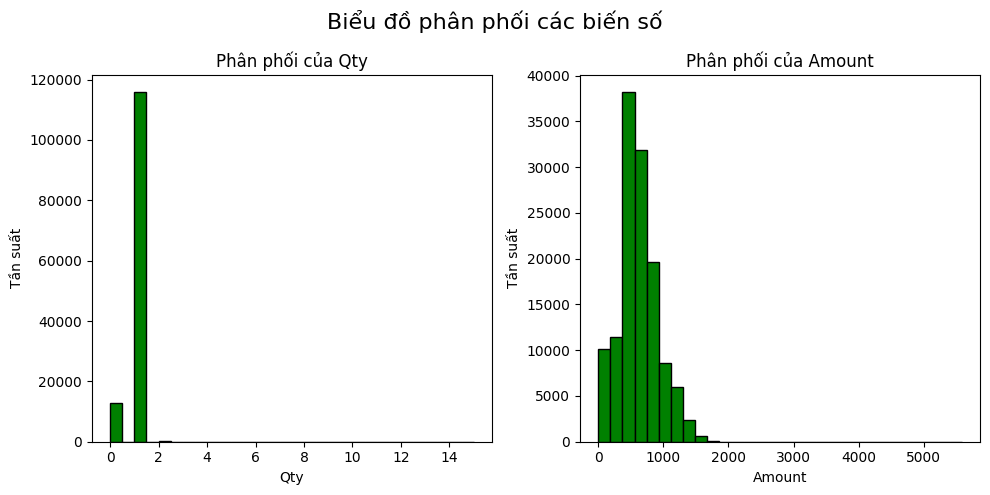

In [9]:
## Phân phối các biến số và chung một fig 
# Biểu đồ phân phối cho các cột số
import matplotlib.pyplot as plt
num_columns = df.select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(nrows=1, ncols=len(num_columns), figsize=(10, 5))

for i, col in enumerate(num_columns):
    df[col].hist(ax=axes[i], bins=30, color='Green', edgecolor='black')
    axes[i].set_title(f'Phân phối của {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Tần suất')
    axes[i].grid(False)

plt.tight_layout()
plt.suptitle('Biểu đồ phân phối các biến số', fontsize=16)
plt.subplots_adjust(top=0.85)  
plt.show()


- Số lượng mua của sản phẩm nằm ở 0 và 1 biểu thị cho việc mua và không mua, nếu 0 là đơn hàng bị hủy, còn 1 là đơn hàng giao dịch thành công. Biểu đồ cho thấy số lượng đơn hàng được giao dịch thành công cao hơn nhiều so với các đơn hàng bị hủy.
- Phân phối Amount cho thấy số tiền thu được của đơn hàng là nằm ở mức thấp (phân phối lệch phải), chủ yếu dao động ở mức 500 - 1500 Rupee cho một đơn hàng.

## 3.2. Đơn hàng bị hủy có đặc điểm gì?
🔍 Mục đích:
So sánh giữa đơn hàng Cancelled và không bị huỷ theo các yếu tố như Amount, ship-state, Courier Status.

### Phân phối số đơn hàng bị huỷ theo bang:



C:\Users\HP\AppData\Local\Temp\ipykernel_11204\538204808.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancelled_by_state.values, y=cancelled_by_state.index, palette='Reds')


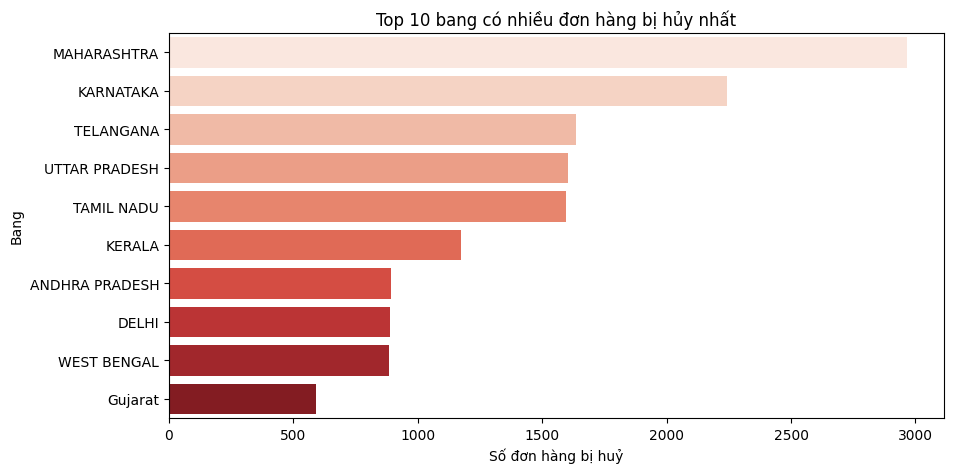

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
cancelled_by_state = df[df['Status'] == 'Cancelled']['ship-state'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=cancelled_by_state.values, y=cancelled_by_state.index, palette='Reds')
plt.title('Top 10 bang có nhiều đơn hàng bị hủy nhất')
plt.xlabel('Số đơn hàng bị huỷ')
plt.ylabel('Bang')
plt.show()



Biểu đồ hiển thị "Top 10 bang có nhiều đơn hàng bị hủy nhất". Dưới đây là những nhận xét về biểu đồ này:

- Tiêu đề: Tiêu đề rõ ràng, cho biết nội dung chính của biểu đồ là "Top 10 bang có nhiều đơn hàng bị hủy nhất".

- Trục tung (Bang): Liệt kê 10 bang theo thứ tự từ bang có số lượng đơn hàng bị hủy ít nhất trong top 10 (Gujarat) đến bang có số lượng đơn hàng bị hủy nhiều nhất (Maharashtra).

- Trục hoành (Số đơn hàng bị hủy): Biểu diễn số lượng đơn hàng bị hủy, với các mốc từ 0 đến 3000.

- Màu sắc: Biểu đồ sử dụng thang màu đỏ/cam, với màu đỏ đậm hơn cho các bang có số lượng đơn hàng bị hủy ít hơn và màu nhạt dần sang cam/hồng cho các bang có số lượng đơn hàng bị hủy nhiều hơn. Điều này giúp dễ dàng phân biệt mức độ giữa các bang.

Dữ liệu nổi bật:
- Maharashtra là bang có số lượng đơn hàng bị hủy cao nhất, gần 3000 đơn hàng.

- Karnataka đứng thứ hai với số lượng đơn hàng bị hủy trên 2000.

- Các bang như Telangana, Uttar Pradesh, Tamil Nadu có số lượng đơn hàng bị hủy tương đối gần nhau, khoảng 1500-1600.

- Kerala có số lượng đơn hàng bị hủy hơn 1000.

- Các bang như Andhra Pradesh, Delhi, West Bengal có số lượng đơn hàng bị hủy dưới 1000 nhưng vẫn nằm trong top 10.

- Gujarat là bang có số lượng đơn hàng bị hủy ít nhất trong top 10, khoảng 500-600 đơn hàng.

### So sánh doanh thu giữa đơn huỷ và không huỷ:


C:\Users\HP\AppData\Local\Temp\ipykernel_11204\277669825.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1[df1['Amount'] > 0],


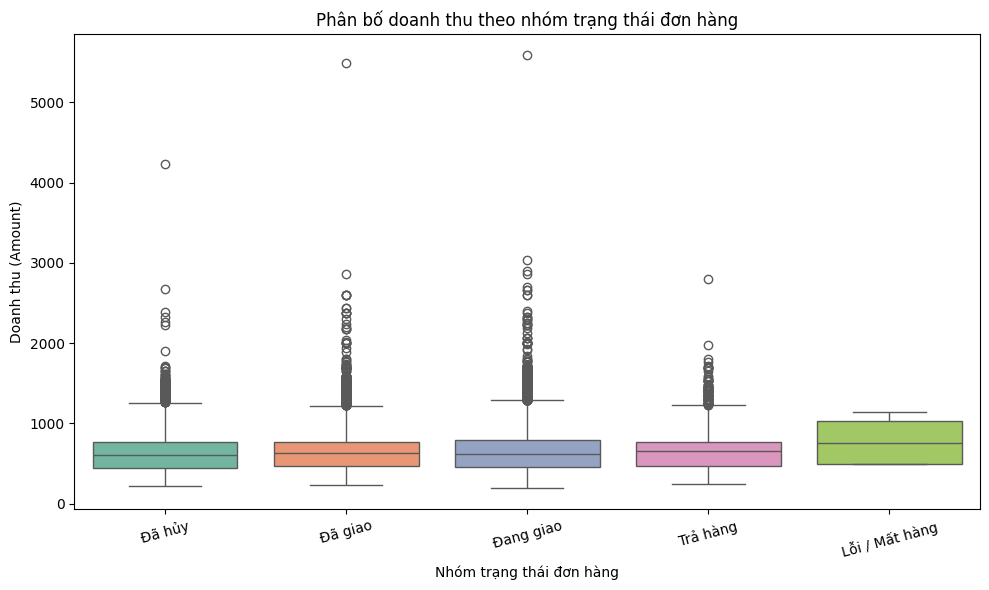

In [11]:
# Nhóm trạng thái đơn hàng
def group_status(status):
    status = str(status).strip().lower()
    if 'delivered to buyer' in status:
        return 'Đã giao'
    elif 'returned' in status or 'rejected' in status or 'returning' in status:
        return 'Trả hàng'
    elif 'damaged' in status or 'lost' in status:
        return 'Lỗi / Mất hàng'
    elif 'cancelled' in status:
        return 'Đã hủy'
    elif 'shipped' in status or 'pending' in status or 'picked up' in status or 'out for delivery' in status:
        return 'Đang giao'
    else:
        return 'Khác'

# Tạo cột nhóm
df1 = df.copy()
df1['StatusGroup'] = df1['Status'].apply(group_status)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df1[df1['Amount'] > 0], 
            x='StatusGroup', y='Amount', palette='Set2')

plt.title('Phân bố doanh thu theo nhóm trạng thái đơn hàng')
plt.xlabel('Nhóm trạng thái đơn hàng')
plt.ylabel('Doanh thu (Amount)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()



Nhận xét chi tiết từng nhóm trạng thái:

Đã hủy:

- Trung vị doanh thu khá thấp, khoảng 500-600.

- Phạm vi doanh thu cũng hẹp.

- Có nhiều điểm ngoại lệ (outliers) với doanh thu rất cao, thậm chí lên đến hơn 4000, cho thấy có những đơn hàng bị hủy nhưng giá trị doanh thu lại rất lớn. Đây là một điểm đáng chú ý cần được điều tra.

Đã giao:

- Trung vị doanh thu tương tự như "Đã hủy", khoảng 500-600.

- Phạm vi doanh thu rộng hơn so với "Đã hủy" (khoảng từ 200-1000).

- Có nhiều điểm ngoại lệ với doanh thu cao, nhưng không quá cao như "Đã hủy".

Đang giao:

- Trung vị doanh thu cao hơn một chút so với "Đã hủy" và "Đã giao", khoảng 600-700.

- Phạm vi doanh thu cũng tương tự "Đã giao".

- Có nhiều điểm ngoại lệ với doanh thu cao.

Trả hàng:

- Trung vị doanh thu thấp nhất trong các nhóm, khoảng 500.

- Phạm vi doanh thu cũng khá hẹp.

- Có một số điểm ngoại lệ với doanh thu cao, nhưng ít hơn các nhóm khác.
Lỗi / Mất hàng:

- Đây là nhóm có phân bố doanh thu khác biệt nhất.

- Trung vị doanh thu cao nhất, khoảng 1000.

- Phạm vi doanh thu cũng cao hơn (khoảng 800-1100).

- Điều đáng chú ý là nhóm này không có ngoại lệ được hiển thị, cho thấy doanh thu của các đơn hàng trong trạng thái này có sự tập trung hơn và ít biến động lớn.

## 3.3. Doanh thu theo thời gian như thế nào?

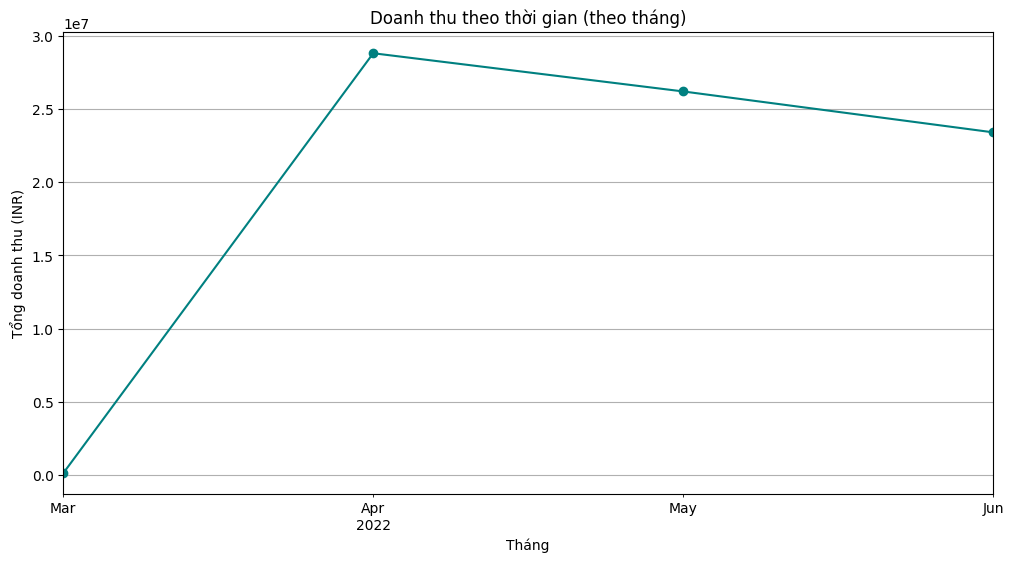

In [12]:
# Thêm cột tháng-năm
df['Month'] = df['Date'].dt.to_period('M')

revenue_by_month = df.groupby('Month')['Amount'].sum()

plt.figure(figsize=(12, 6))
revenue_by_month.plot(marker='o', color='teal')
plt.title('Doanh thu theo thời gian (theo tháng)')
plt.xlabel('Tháng')
plt.ylabel('Tổng doanh thu (INR)')
plt.grid(True)
plt.show()


Xu hướng doanh thu:

- Tháng 3 (Mar): Doanh thu rất thấp, gần như bằng 0. Có thể là điểm khởi đầu của dữ liệu hoặc tháng đầu tiên hoạt động.

- Tháng 4 (Apr): Doanh thu tăng vọt một cách ấn tượng, đạt đỉnh điểm ở mức gần 29,000,000 INR (29 triệu INR). Đây là mức doanh thu cao nhất trong giai đoạn được biểu đồ thể hiện.

- Tháng 5 (May): Doanh thu có sự sụt giảm nhẹ so với tháng 4, xuống còn khoảng 26,000,000 INR (26 triệu INR). Mặc dù giảm, đây vẫn là một mức doanh thu rất cao.

- Tháng 6 (Jun): Doanh thu tiếp tục giảm so với tháng 5, xuống còn khoảng 23,000,000 INR (23 triệu INR).

Kết luận chung:

- Biểu đồ cho thấy một sự tăng trưởng vượt bậc về doanh thu từ tháng 3 lên tháng 4 năm 2022.

- Sau khi đạt đỉnh vào tháng 4, doanh thu có xu hướng giảm dần trong tháng 5 và tháng 6.

- Mặc dù có sự sụt giảm trong hai tháng gần đây nhất, mức doanh thu trong tháng 5 và tháng 6 vẫn rất đáng kể so với tháng 3.

- Cần phân tích thêm để hiểu lý do của sự tăng trưởng mạnh trong tháng 4 và sự sụt giảm nhẹ trong các tháng tiếp theo (ví dụ: các chiến dịch marketing, thay đổi chính sách, yếu tố mùa vụ, hoặc sự cạnh tranh).

# 4. XỬ LÝ DỮ LIỆU ĐẦU VÀO CHO MÔ HÌNH ML (HỒI QUY VÀ PHÂN LOẠI)

## 4.1. Chọn biến mục tiêu (target) và loại mô hình


🎯 Xác định mục tiêu và bài toán

- **Mô hình phân loại:** Dự đoán đơn hàng có bị **huỷ (Status = "Cancelled")** hay không. Chuyển `Status` thành biến nhị phân 0/1.
- **Mô hình hồi quy:** Dự đoán **Amount** (doanh thu đơn hàng) dựa trên các đặc trưng như sản phẩm, khu vực, dịch vụ vận chuyển, v.v.


In [13]:
# Phân loại: Biến mục tiêu nhị phân
df['Cancelled'] = df['Status'].apply(lambda x: 1 if x == 'Cancelled' else 0)

# Hồi quy: Biến mục tiêu là Amount (đã làm sạch trước đó)
df_report = df.copy()

## 4.2. Lọc dữ liệu không hợp lệ


🔎 Lọc dữ liệu

- Bỏ các đơn hàng có `Amount <= 0` (lỗi nhập hoặc đơn không có giá trị).
- Chỉ giữ các dòng có `Qty > 0`.


In [14]:
df_model = df[(df['Amount'] > 0) & (df['Qty'] > 0)].copy()


## 4.3. Mã hoá biến phân loại (Categorical Encoding)


Mã hoá biến phân loại

- Sử dụng **Label Encoding** để biến các cột phân loại thành dạng số.
- Giúp mô hình ML hiểu và xử lý các biến phân loại.


In [15]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Tách các cột dạng chuỗi
cat_cols = df_model.select_dtypes(include='object').columns.tolist()

# Khởi tạo bộ lưu encoder
label_encoders = {}
df_encoded = df_model.copy()

# Duyệt từng cột phân loại
for col in cat_cols:
    n_unique = df_model[col].nunique()
    
    if n_unique > 5:
        # Dùng Label Encoding
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_model[col].astype(str))
        label_encoders[col] = le  # Lưu encoder nếu muốn inverse sau
    else:
        # Dùng One-Hot Encoding
        dummies = pd.get_dummies(df_model[col], prefix=col)
        df_encoded = pd.concat([df_encoded.drop(columns=[col]), dummies], axis=1)

# Kết quả
display(df_encoded.head())
df_model = df_encoded.copy()

,Order ID,Date,Status,Style,SKU,Category,Size,ASIN,Qty,Amount,...,B2B,Month,Cancelled,Fulfilment_Amazon,Fulfilment_Merchant,Sales Channel _Amazon.in,ship-service-level_Expedited,ship-service-level_Standard,currency_INR,ship-country_IN
1,12248,2022-04-30,5,844,4378,8,0,5217,1,406.0,...,False,2022-04,0,False,True,True,False,True,True,True
2,40793,2022-04-30,3,530,2588,8,8,666,1,329.0,...,True,2022-04,0,True,False,True,True,False,True,True
4,81106,2022-04-30,3,751,3781,6,0,4297,1,574.0,...,False,2022-04,0,True,False,True,True,False,True,True
5,41815,2022-04-30,3,1229,6199,5,8,2894,1,824.0,...,False,2022-04,0,True,False,True,True,False,True,True
6,100431,2022-04-30,3,180,647,5,5,1653,1,653.0,...,False,2022-04,0,True,False,True,True,False,True,True


## 4.4. Lựa chọn đặc trưng


In [16]:

#  Loại bỏ các cột không phù hợp
cols_to_drop = [
    'order-id', 'customer-name', 'ship-address', 'ship-city',
    'ship-phone-number', 'Date', 'Status', 'order-item-id', 'currency', 'Month','Courier Status'
]
df_model = df_model.drop(columns=[col for col in cols_to_drop if col in df.columns], errors='ignore')

df_model.head()

,Order ID,Style,SKU,Category,Size,ASIN,Qty,Amount,ship-state,ship-postal-code,promotion-ids,B2B,Cancelled,Fulfilment_Amazon,Fulfilment_Merchant,Sales Channel _Amazon.in,ship-service-level_Expedited,ship-service-level_Standard,currency_INR,ship-country_IN
1,12248,844,4378,8,0,5217,1,406.0,22,560085,1999,False,0,False,True,True,False,True,True,True
2,40793,530,2588,8,8,666,1,329.0,27,410210,5705,True,0,True,False,True,True,False,True,True
4,81106,751,3781,6,0,4297,1,574.0,54,600073,5716,False,0,True,False,True,True,False,True,True
5,41815,1229,6199,5,8,2894,1,824.0,57,201102,5705,False,0,True,False,True,True,False,True,True
6,100431,180,647,5,5,1653,1,653.0,9,160036,5705,False,0,True,False,True,True,False,True,True


## 4.5. Thực hiện xử lý mất cân bằng dữ liệu và chọn biến mục tiêu


In [17]:
from imblearn.over_sampling import SMOTE

X = df_model.drop(columns=['Amount', 'Cancelled'], errors='ignore')
y_class = df_model['Cancelled']
y_reg = df_model['Amount']
print("Trước SMOTE:")
print(y_class.value_counts())
#  Cân bằng dữ liệu bằng SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_class = smote.fit_resample(X, y_class)
print("Sau SMOTE:")
print(y_class.value_counts())

Trước SMOTE:
Cancelled
0    108042
1      5628
Name: count, dtype: int64
Sau SMOTE:
Cancelled
0    108042
1    108042
Name: count, dtype: int64


## 4.6. Chuẩn hoá dữ liệu số (Feature Scaling)


📏 Chuẩn hoá dữ liệu số

- Các mô hình như hồi quy tuyến tính hoặc logistic thường yêu cầu dữ liệu ở cùng một thang đo.
- Dùng StandardScaler để chuẩn hoá các biến số.


In [18]:
print(X.head())

   Order ID  Style   SKU  Category  Size  ASIN  Qty  ship-state  \
1     12248    844  4378         8     0  5217    1          22   
2     40793    530  2588         8     8   666    1          27   
4     81106    751  3781         6     0  4297    1          54   
5     41815   1229  6199         5     8  2894    1          57   
6    100431    180   647         5     5  1653    1           9   

  ship-postal-code  promotion-ids    B2B  Fulfilment_Amazon  \
1           560085           1999  False              False   
2           410210           5705   True               True   
4           600073           5716  False               True   
5           201102           5705  False               True   
6           160036           5705  False               True   

   Fulfilment_Merchant  Sales Channel _Amazon.in  \
1                 True                      True   
2                False                      True   
4                False                      True   
5         

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)
X_scaled_reg = pd.DataFrame(X)
display(X_scaled[:5, :])

array([[-1.32884207e+00,  2.52709948e-01,  3.03807214e-01,
         1.17459245e+00, -2.39925060e+00,  8.42732016e-01,
        -3.88856778e-02, -5.84570922e-01,  4.86319793e-01,
        -2.87612493e+00, -9.36085045e-02, -2.41715713e+00,
         2.41715713e+00,  0.00000000e+00, -2.41442672e+00,
         2.40863257e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.98739163e-01, -6.10276435e-01, -6.16532139e-01,
         1.17459245e+00,  6.76967594e-01, -1.50743979e+00,
        -3.88856778e-02, -3.03130762e-01, -3.05283744e-01,
         3.37984891e-01,  1.06827900e+01,  4.13709141e-01,
        -4.13709141e-01,  0.00000000e+00,  4.14176994e-01,
        -4.15173328e-01,  0.00000000e+00,  0.00000000e+00],
       [ 9.14809220e-01, -2.88792945e-03, -3.14395568e-03,
        -2.28850956e-01, -2.39925060e+00,  3.67636858e-01,
        -3.88856778e-02,  1.21664611e+00,  6.97526747e-01,
         3.47524883e-01, -9.36085045e-02,  4.13709141e-01,
        -4.13709141e-01,  0.00000000e+00,  4.14176994e

## 4.7. Chia tập huấn luyện và kiểm tra


In [20]:
from sklearn.model_selection import train_test_split

# Cho mô hình phân loại
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_scaled, y_class, test_size=0.2, random_state=42)

# Cho mô hình hồi quy
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_scaled_reg, y_reg, test_size=0.2, random_state=42)


# 5. XÂY DỰNG MÔ HÌNH PHÂN LOẠI


## 5.1. Logistic Regression

- Phù hợp cho bài toán nhị phân (Cancelled: 1 hoặc 0)
- Cho xác suất dự đoán → dễ diễn giải

**Tham số quan trọng:**
- `penalty='l2'`: chuẩn hóa L2 (mặc định) giúp giảm overfitting.
- `C=1.0`: hệ số điều chỉnh phạt regularization. Càng nhỏ thì regularization càng mạnh.
- `solver='liblinear'`: phù hợp với dữ liệu nhỏ và ít đặc trưng.
- `random_state=42`: để kết quả có thể tái lập được.

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.72      0.83     21526
           1       0.78      1.00      0.88     21691

    accuracy                           0.86     43217
   macro avg       0.89      0.86      0.85     43217
weighted avg       0.89      0.86      0.85     43217



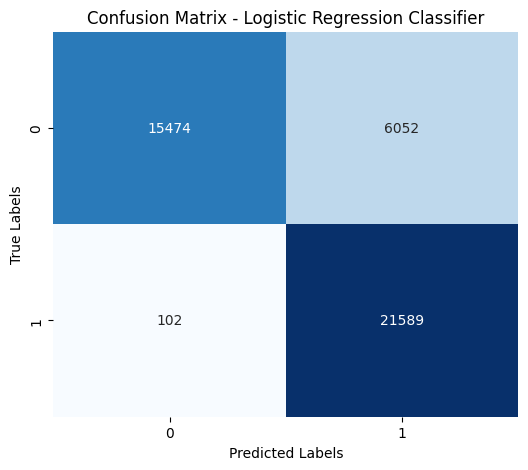

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Huấn luyện Logistic Regression
logreg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
logreg.fit(X_train_cls, y_train_cls)

# Dự đoán và đánh giá
y_pred_cls = logreg.predict(X_test_cls)
print("Classification Report:")
print(classification_report(y_test_cls, y_pred_cls))
# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test_cls, y_pred_cls)

# Vẽ biểu đồ heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression Classifier')
plt.show()


 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84     21526
           1       0.79      0.99      0.88     21691

    accuracy                           0.86     43217
   macro avg       0.89      0.86      0.86     43217
weighted avg       0.89      0.86      0.86     43217



c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


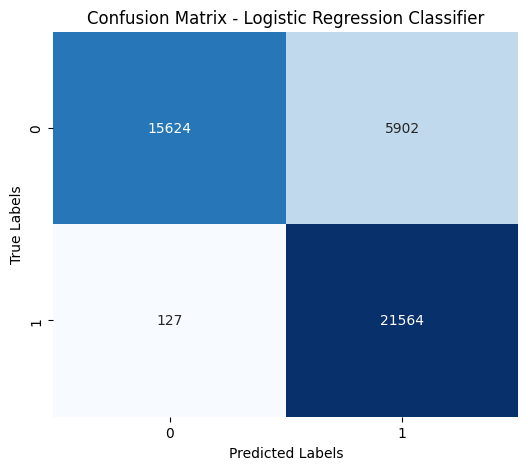

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Huấn luyện Logistic Regression
logreg = LogisticRegression(penalty='l1',C=1.0, solver='liblinear', random_state=42)
logreg.fit(X_train_cls, y_train_cls)

# Dự đoán và đánh giá
y_pred_cls = logreg.predict(X_test_cls)
print(" Classification Report:")
print(classification_report(y_test_cls, y_pred_cls))
# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test_cls, y_pred_cls)

# Vẽ biểu đồ heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression Classifier')
plt.show()


## 5.2. Mô hình Naive Bayes

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84     21526
           1       0.79      0.99      0.88     21691

    accuracy                           0.86     43217
   macro avg       0.89      0.86      0.86     43217
weighted avg       0.89      0.86      0.86     43217

Confusion Matrix:
[[15668  5858]
 [  142 21549]]


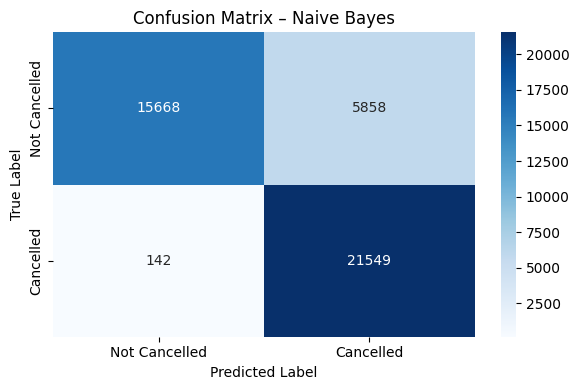

In [23]:
from sklearn.naive_bayes import GaussianNB

# Huấn luyện Naive Bayesc
nb = GaussianNB()
nb.fit(X_train_cls, y_train_cls)

# Dự đoán và đánh giá
y_pred_nb = nb.predict(X_test_cls)
print("Naive Bayes Classification Report:")
print(classification_report(y_test_cls, y_pred_nb))
print("Confusion Matrix:")
print(confusion_matrix(y_test_cls, y_pred_nb))

# Ma trận nhầm lẫn
cm_nb = confusion_matrix(y_test_cls, y_pred_nb)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Cancelled', 'Cancelled'], yticklabels=['Not Cancelled', 'Cancelled'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix – Naive Bayes')
plt.tight_layout()
plt.show()


## 5.3. Mô hình cây quyết định - Decision Tree
**Tham số được chọn:**
- `min_samples_split=10`: Một nút chỉ được chia nếu có ít nhất 10 mẫu → kiểm soát số lượng nhánh, tránh phân tách quá nhỏ.
- `max_depth=25`: Giới hạn độ sâu của mỗi cây để tránh overfitting. Độ sâu nhỏ hơn giúp mô hình tổng quát hơn.
- `random_state=42`: Đảm bảo tính lặp lại.

 Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     21526
           1       0.94      0.95      0.94     21691

    accuracy                           0.94     43217
   macro avg       0.94      0.94      0.94     43217
weighted avg       0.94      0.94      0.94     43217



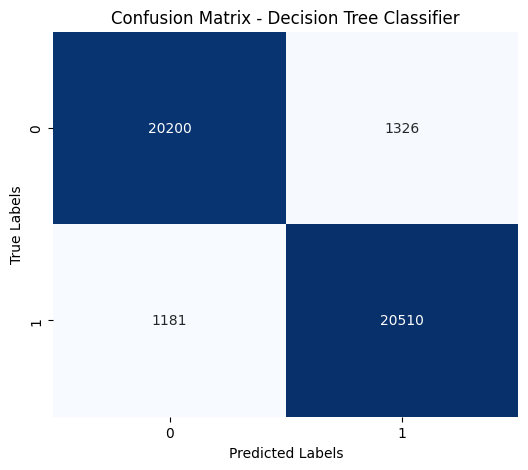

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Mô hình cây quyết định
dt_cls = DecisionTreeClassifier(
    max_depth=25,
    min_samples_split=10,
    random_state=42
)

# Huấn luyện mô hình
dt_cls.fit(X_train_cls, y_train_cls)

# Dự đoán
y_pred_dt_cls = dt_cls.predict(X_test_cls)

# Đánh giá
print(" Decision Tree Classifier Report:")
print(classification_report(y_test_cls, y_pred_dt_cls))
# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test_cls, y_pred_dt_cls)

# Vẽ biểu đồ heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()


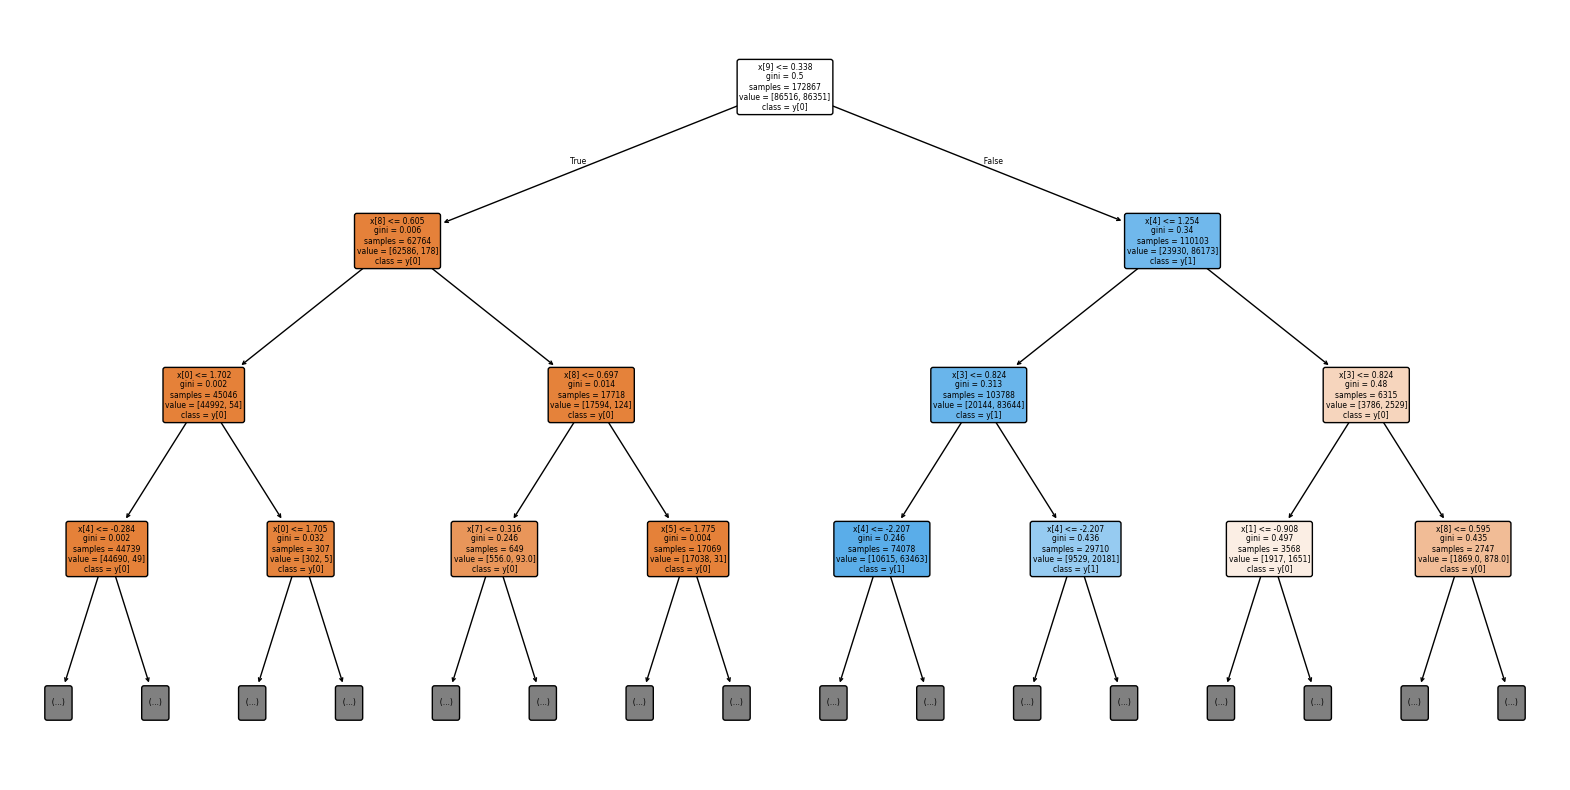

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))  # Kích thước hình lớn để nhìn rõ
plot_tree(
    dt_cls, 
    filled=True,            # tô màu các nút theo lớp
    rounded=True,           # bo tròn các ô
    class_names=True,       # hiện tên lớp (nếu có)
    feature_names=X_train_cls.columns if hasattr(X_train_cls, 'columns') else None,  # tên các đặc trưng
    max_depth=3            # chỉ vẽ sâu tối đa 3 tầng để dễ nhìn, bạn có thể bỏ hoặc tăng số tầng
)
plt.show()

In [26]:
y_train_pred_rf_cls = dt_cls.predict(X_train_cls)
print("Train Accuracy:", dt_cls.score(X_train_cls, y_train_cls))
print("Test Accuracy:", dt_cls.score(X_test_cls, y_test_cls))

Train Accuracy: 0.9750501830887329
Test Accuracy: 0.9419904204364024


## 5.4. Mô hình phân loại: Random Forest Classifier

Mô hình rừng ngẫu nhiên là một tập hợp nhiều cây quyết định. Ưu điểm:
- Xử lý tốt dữ liệu phức tạp, không tuyến tính
- Kháng nhiễu và overfitting tốt hơn so với cây đơn

**Tham số được chọn:**
- `n_estimators=100`:Sử dụng 100 cây quyết định trong rừng → giá trị mặc định ổn định cho nhiều bài toán.
- `min_samples_split=10`: Một nút chỉ được chia nếu có ít nhất 10 mẫu → kiểm soát số lượng nhánh, tránh phân tách quá nhỏ.
- `max_depth=25`: Giới hạn độ sâu của mỗi cây để tránh overfitting. Độ sâu nhỏ hơn giúp mô hình tổng quát hơn.
- `random_state=42`: Đảm bảo tính lặp lại.

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94     21526
           1       0.92      0.97      0.95     21691

    accuracy                           0.95     43217
   macro avg       0.95      0.95      0.95     43217
weighted avg       0.95      0.95      0.95     43217



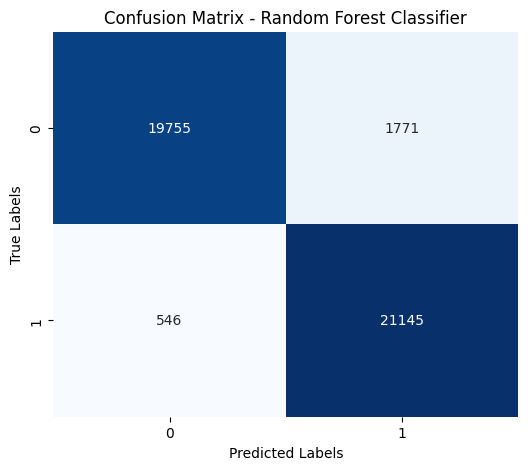

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Mô hình phân loại
rf_cls = RandomForestClassifier(
    max_depth=25,
    n_estimators=100,
    min_samples_split=10,
    random_state=42
)

rf_cls.fit(X_train_cls, y_train_cls)
y_pred_rf_cls = rf_cls.predict(X_test_cls)

# Đánh giá
print("Random Forest Classifier Report:")
print(classification_report(y_test_cls, y_pred_rf_cls))
# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test_cls, y_pred_rf_cls)

# Vẽ biểu đồ heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()


In [28]:
y_train_pred_rf_cls = rf_cls.predict(X_train_cls)
print("Train Accuracy:", rf_cls.score(X_train_cls, y_train_cls))
print("Test Accuracy:", rf_cls.score(X_test_cls, y_test_cls))


Train Accuracy: 0.9695372743207206
Test Accuracy: 0.9463868385126224


# 6. XÂY DỰNG MÔ HÌNH HỒI QUY


## 6.1. Linear Regression

- Dự đoán biến liên tục: `Amount`
- Dễ hiểu, nhanh huấn luyện, dễ diễn giải hệ số.

**Không cần nhiều tham số:** chỉ cần mặc định.

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Huấn luyện mô hình hồi quy tuyến tính
linreg = LinearRegression()
linreg.fit(X_train_reg, y_train_reg)

# Dự đoán và đánh giá
y_pred_reg = linreg.predict(X_test_reg)

# Đánh giá kết quả
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


MSE: 47396.07
R² Score: 0.34


## 6.2. Mô hình hồi quy: Ridge Regression 
- Áp dụng regularization giúp giảm ảnh hưởng của thuộc tính có hệ số lớn bất thường.
- Giữ lại tất cả đặc trưng, nhưng giảm trọng số các đặc trưng ít quan trọng.
- Thích hợp với dữ liệu nhiều chiều, giúp mô hình ổn định và tránh overfitting.

In [30]:
from sklearn.linear_model import Ridge

# Huấn luyện Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_reg, y_train_reg)

# Dự đoán và đánh giá
y_pred_ridge = ridge.predict(X_test_reg)
mse_ridge = mean_squared_error(y_test_reg, y_pred_ridge)
r2_ridge = r2_score(y_test_reg, y_pred_ridge)

print(f"MSE: {mse_ridge:.2f}")
print(f"R² Score: {r2_ridge:.2f}")


MSE: 47395.87
R² Score: 0.34


## 6.2. Mô hình hồi quy: Random Forest Regressor

Rừng ngẫu nhiên hồi quy cũng là một tổ hợp nhiều cây quyết định, nhưng trả về trung bình kết quả dự đoán.

**Tham số được chọn:**
- `n_estimators=100`: Dùng 100 cây quyết định, tăng độ chính xác.
- `max_depth=15`: Hạn chế độ sâu để giảm overfitting.
- `min_samples_split=10`: Giúp cây không chia khi số lượng mẫu nhỏ.
- `random_state=42`: Đảm bảo kết quả có thể tái lập.


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Mô hình hồi quy
rf_reg = RandomForestRegressor(
    n_estimators=100,
    max_depth=25,
    min_samples_split=10,
    random_state=42
)

rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf_reg = rf_reg.predict(X_test_reg)

# Đánh giá
mse_rf = mean_squared_error(y_test_reg, y_pred_rf_reg)
r2_rf = r2_score(y_test_reg, y_pred_rf_reg)

print(f" Random Forest Regressor - MSE: {mse_rf:.2f}")
print(f" Random Forest Regressor - R² Score: {r2_rf:.2f}")


 Random Forest Regressor - MSE: 3084.55
 Random Forest Regressor - R² Score: 0.96


### 🎯 ROC Curve và AUC Score

- **ROC (Receiver Operating Characteristic)** thể hiện sự đánh đổi giữa TPR (True Positive Rate) và FPR (False Positive Rate).
- **AUC (Area Under Curve)** là diện tích dưới đường ROC, đánh giá độ phân biệt của mô hình.
  - AUC ~ 1: mô hình tốt
  - AUC ~ 0.5: mô hình ngẫu nhiên


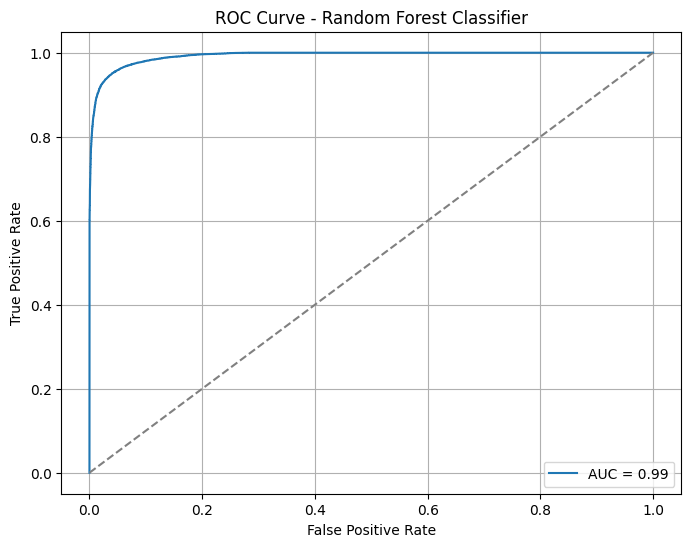

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Dự đoán xác suất
y_proba_rf = rf_cls.predict_proba(X_test_cls)[:, 1]

# Tính ROC
fpr, tpr, thresholds = roc_curve(y_test_cls, y_proba_rf)
auc_score = roc_auc_score(y_test_cls, y_proba_rf)

# Vẽ ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend()
plt.grid(True)
plt.show()


### 🔍 Feature Importance

Random Forest cung cấp độ quan trọng của từng thuộc tính đầu vào:
- Đặc trưng càng quan trọng → càng ảnh hưởng đến dự đoán.
- Giúp chọn đặc trưng tốt, loại bỏ nhiễu.


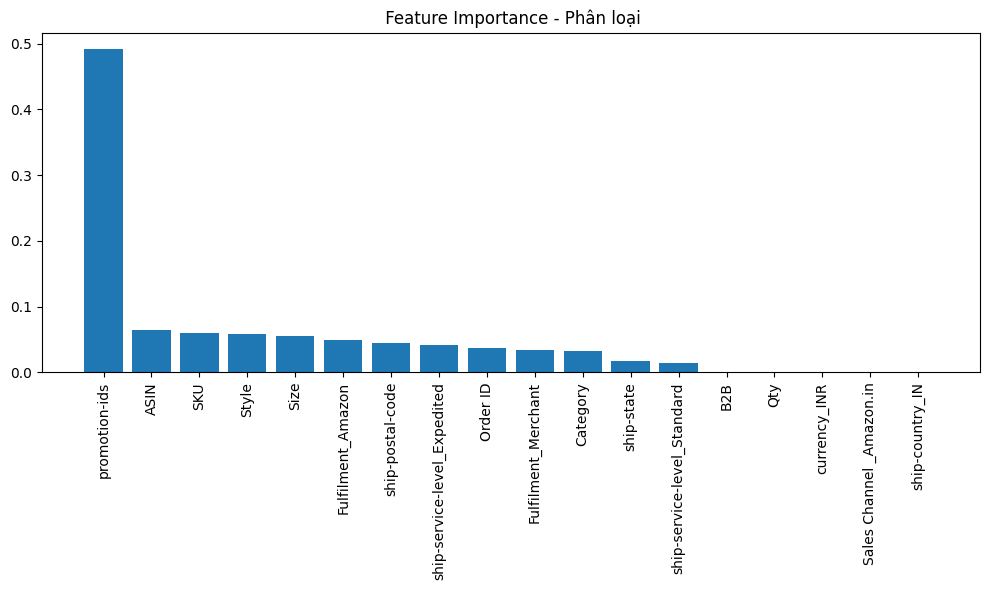

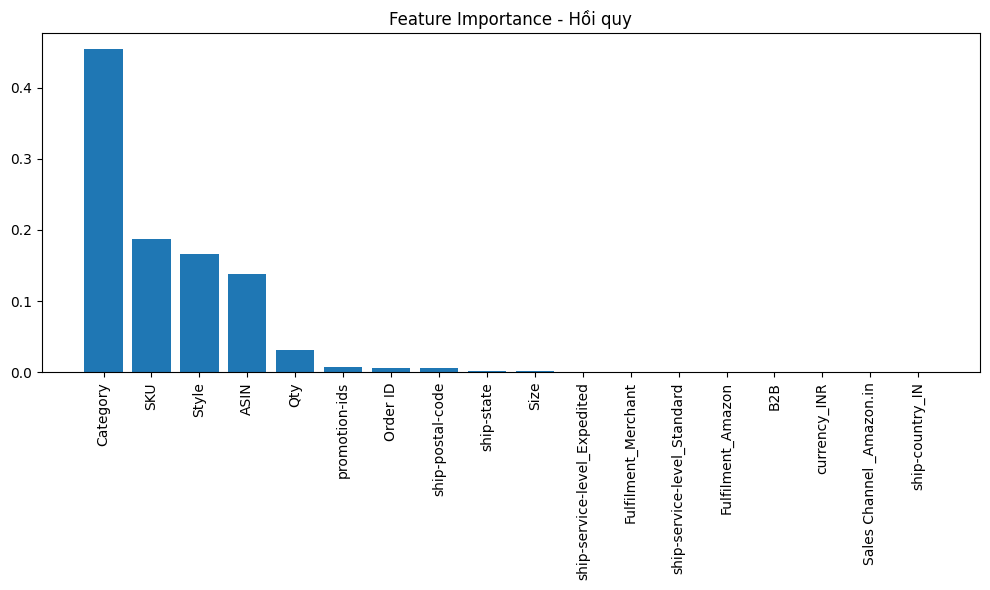

In [33]:
import pandas as pd
import numpy as np

# Feature names
feature_names = X.columns

# Phân loại - Feature Importance
importances_cls = rf_cls.feature_importances_
indices_cls = np.argsort(importances_cls)[::-1]

plt.figure(figsize=(10,6))
plt.title(" Feature Importance - Phân loại")
plt.bar(range(len(importances_cls)), importances_cls[indices_cls], align='center')
plt.xticks(range(len(importances_cls)), feature_names[indices_cls], rotation=90)
plt.tight_layout()
plt.show()

# Hồi quy - Feature Importance
importances_reg = rf_reg.feature_importances_
indices_reg = np.argsort(importances_reg)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance - Hồi quy")
plt.bar(range(len(importances_reg)), importances_reg[indices_reg], align='center')
plt.xticks(range(len(importances_reg)), feature_names[indices_reg], rotation=90)
plt.tight_layout()
plt.show()


# 7. PHÂN CỤM DỮ LIỆU BẰNG K-MEANS 

Phần này áp dụng thuật toán học không giám sát K-Means để khám phá các nhóm tự nhiên (cụm) trong dữ liệu đơn hàng. Mục tiêu là hiểu rõ hơn về các phân khúc đơn hàng dựa trên đặc điểm của chúng.ns

K-Means là một thuật toán phân cụm phổ biến nhằm mục đích phân chia N quan sát vào K cụm sao cho mỗi quan sát thuộc về cụm có giá trị trung bình (tâm cụm) gần nhất.

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA # Để trực quan hóa
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Sử dụng df_model đã được mã hóa và tiền xử lý ở các bước trên
df_for_clustering_input = df_model.copy()

cols_to_drop_for_clustering = [
    'Amount', 'Cancelled', 'Order ID', 'SKU', 'ASIN', 'ship-postal-code'
]
X_cluster = df_for_clustering_input.drop(columns=[col for col in cols_to_drop_for_clustering if col in df_for_clustering_input.columns], errors='ignore')

print("Các cột được sử dụng cho phân cụm (trước khi chuẩn hóa):")
print(X_cluster.columns.tolist())

for col in X_cluster.columns:
    if X_cluster[col].dtype == 'bool':
        X_cluster[col] = X_cluster[col].astype(int)
    elif X_cluster[col].nunique() == 2 and X_cluster[col].min() == 0 and X_cluster[col].max() == 1:
         if X_cluster[col].dtype not in ['int64', 'int32']:
            X_cluster[col] = X_cluster[col].astype(int)

cols_to_scale = [col for col in X_cluster.columns
                   if (X_cluster[col].dtype in ['int64', 'int32', 'float64']) and (X_cluster[col].nunique() > 2)]

print("\nCác cột sẽ được StandardScaler áp dụng:")
print(cols_to_scale)

X_cluster_scaled = X_cluster.copy()
if cols_to_scale:
    scaler_cluster = StandardScaler()
    X_cluster_scaled[cols_to_scale] = scaler_cluster.fit_transform(X_cluster[cols_to_scale])
else:
    print("Không có cột nào cần áp dụng StandardScaler.")

print("\nKích thước dữ liệu đầu vào cho phân cụm (đã chuẩn hóa):", X_cluster_scaled.shape)
print("\n5 dòng đầu của dữ liệu đã chuẩn hóa:")
display(X_cluster_scaled.head())

Các cột được sử dụng cho phân cụm (trước khi chuẩn hóa):
['Style', 'Category', 'Size', 'Qty', 'ship-state', 'promotion-ids', 'B2B', 'Fulfilment_Amazon', 'Fulfilment_Merchant', 'Sales Channel _Amazon.in', 'ship-service-level_Expedited', 'ship-service-level_Standard', 'currency_INR', 'ship-country_IN']

Các cột sẽ được StandardScaler áp dụng:
['Style', 'Category', 'Size', 'Qty', 'ship-state', 'promotion-ids']

Kích thước dữ liệu đầu vào cho phân cụm (đã chuẩn hóa): (113670, 14)

5 dòng đầu của dữ liệu đã chuẩn hóa:


,Style,Category,Size,Qty,ship-state,promotion-ids,B2B,Fulfilment_Amazon,Fulfilment_Merchant,Sales Channel _Amazon.in,ship-service-level_Expedited,ship-service-level_Standard,currency_INR,ship-country_IN
1,0.227321,1.043055,-2.206075,-0.052501,-0.590945,-1.969148,0,0,1,1,0,1,1,1
2,-0.602453,1.043055,0.573685,-0.052501,-0.311753,0.500187,1,1,0,1,1,0,1,1
4,-0.018440,-0.273468,-2.206075,-0.052501,1.195881,0.507516,0,1,0,1,1,0,1,1
5,1.244719,-0.931729,0.573685,-0.052501,1.363396,0.500187,0,1,0,1,1,0,1,1
6,-1.527360,-0.931729,-0.468725,-0.052501,-1.316843,0.500187,0,1,0,1,1,0,1,1


## 7.1. Xác định số cụm (k) tối ưu

Để xác định số lượng cụm (k) phù hợp cho thuật toán K-Means, hai phương pháp phổ biến được sử dụng là Elbow Method và Silhouette Score.

*   **Elbow Method:** Tính toán tổng bình phương sai số trong từng cụm (WCSS) cho các giá trị k khác nhau. Điểm "khuỷu tay" (elbow) trên biểu đồ WCSS theo k, nơi đường cong bắt đầu thay đổi độ dốc một cách rõ rệt, thường gợi ý số cụm tối ưu.
*   **Silhouette Score:** Đo lường mức độ một đối tượng phù hợp với cụm của nó so với các cụm khác. Giá trị dao động từ -1 đến 1; giá trị càng gần 1 cho thấy các cụm càng được phân tách tốt.

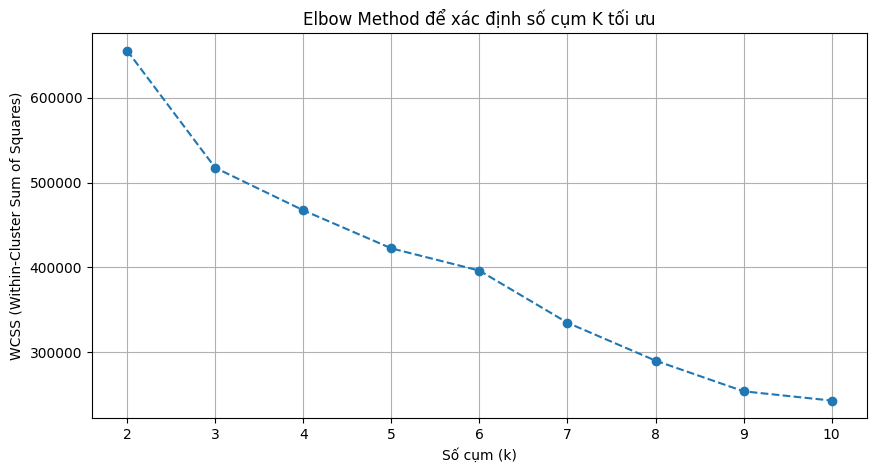

Tính Silhouette Score trên mẫu con 10000 điểm.
Với k=2, Silhouette Score là 0.2243
Với k=3, Silhouette Score là 0.2739
Với k=4, Silhouette Score là 0.2734
Với k=5, Silhouette Score là 0.2789
Với k=6, Silhouette Score là 0.2956
Với k=7, Silhouette Score là 0.2841
Với k=8, Silhouette Score là 0.2902
Với k=9, Silhouette Score là 0.2985
Với k=10, Silhouette Score là 0.2919


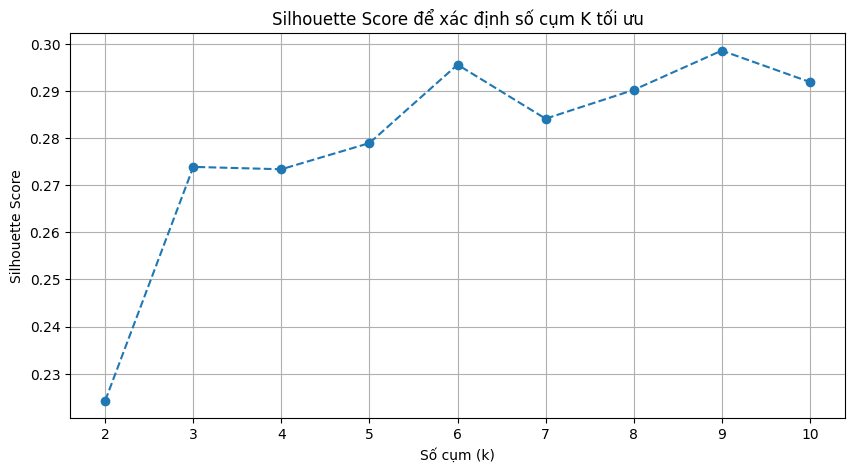

In [35]:
# Elbow Method
wcss = []
k_range = range(2, 11) # Thử từ 2 đến 10 cụm
for i in k_range:
    kmeans_elbow = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    kmeans_elbow.fit(X_cluster_scaled) # Sử dụng dữ liệu đã chuẩn hóa
    wcss.append(kmeans_elbow.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method để xác định số cụm K tối ưu')
plt.xlabel('Số cụm (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# Silhouette Score
silhouette_scores = []
sample_size_silhouette = min(10000, X_cluster_scaled.shape[0])
if X_cluster_scaled.shape[0] > sample_size_silhouette:
    # Nếu X_cluster_scaled là NumPy array, cần chuyển sang DataFrame để dùng .sample()
    if isinstance(X_cluster_scaled, np.ndarray):
        df_temp_for_sample_sil = pd.DataFrame(X_cluster_scaled, columns=X_cluster.columns)
        X_sample_silhouette = df_temp_for_sample_sil.sample(sample_size_silhouette, random_state=42)
    else: # Nếu đã là DataFrame
        X_sample_silhouette = X_cluster_scaled.sample(sample_size_silhouette, random_state=42)
    print(f"Tính Silhouette Score trên mẫu con {sample_size_silhouette} điểm.")
else:
    X_sample_silhouette = X_cluster_scaled
    print("Tính Silhouette Score trên toàn bộ dữ liệu.")

for i in k_range:
    kmeans_silhouette = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    # Sử dụng .values nếu X_sample_silhouette là DataFrame
    data_for_fit_predict = X_sample_silhouette.values if isinstance(X_sample_silhouette, pd.DataFrame) else X_sample_silhouette
    cluster_labels_silhouette = kmeans_silhouette.fit_predict(data_for_fit_predict)

    if len(np.unique(cluster_labels_silhouette)) > 1:
      silhouette_avg = silhouette_score(data_for_fit_predict, cluster_labels_silhouette)
      silhouette_scores.append(silhouette_avg)
      print(f"Với k={i}, Silhouette Score là {silhouette_avg:.4f}")
    else:
      silhouette_scores.append(-1)
      print(f"Với k={i}, không thể tính Silhouette Score (chỉ tạo ra 1 cụm).")

plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score để xác định số cụm K tối ưu')
plt.xlabel('Số cụm (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

## 7.2. Diễn giải lựa chọn số cụm `k`

Từ kết quả của Elbow Method và Silhouette Score:

*   **Elbow Method:** Biểu đồ WCSS cho thấy một điểm uốn cong ("khuỷu tay") khá rõ ràng tại `k=3`. Sau điểm này, việc tăng số cụm không làm giảm WCSS một cách đáng kể nữa, cho thấy `k=3` là một lựa chọn tốt.
*   **Silhouette Score:** Điểm số Silhouette tăng mạnh từ `k=2` (0.2243) lên `k=3` (0.2739). Mặc dù các giá trị `k` lớn hơn như `k=6` (0.2956) và `k=9` (0.2985) cho điểm Silhouette cao hơn, việc chọn số cụm cũng cần cân nhắc đến khả năng diễn giải của các cụm. Một số cụm ít hơn thường dễ hiểu và có ý nghĩa thực tế hơn.

Xét đến sự rõ ràng của "khuỷu tay" trong Elbow Method và sự cải thiện đáng kể của Silhouette Score tại `k=3`, cùng với mục tiêu tạo ra các phân khúc dễ diễn giải, **`k=3` được lựa chọn** là số cụm để tiến hành huấn luyện mô hình K-Means.

Số lượng điểm dữ liệu trong mỗi cụm (K-Means, k=3) theo nhãn gốc K-Means:
0    28463
1    56859
2    28348
Name: count, dtype: int64


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


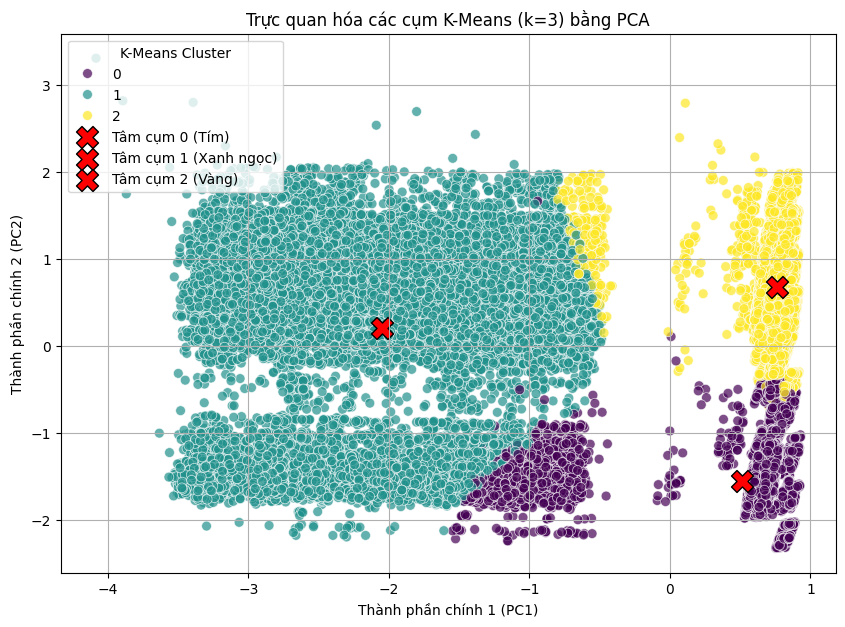


Số lượng điểm dữ liệu trong mỗi cụm (K-Means, k=3) dùng cho profiling (theo nhãn gốc K-Means):
KMeans_Cluster
0    28463
1    56859
2    28348
Name: count, dtype: int64


In [36]:
optimal_k = 3 # Đã quyết định dựa trên phân tích

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init='auto')
kmeans_labels_raw = kmeans.fit_predict(X_cluster_scaled)

df_kmeans_analysis = X_cluster.copy()
df_kmeans_analysis['KMeans_Cluster_Raw'] = kmeans_labels_raw

if 'Amount' in df_for_clustering_input.columns:
    df_kmeans_analysis['Amount'] = df_for_clustering_input.loc[df_kmeans_analysis.index, 'Amount']
if 'Qty' in df_for_clustering_input.columns:
    df_kmeans_analysis['Qty'] = df_for_clustering_input.loc[df_kmeans_analysis.index, 'Qty']

print(f"Số lượng điểm dữ liệu trong mỗi cụm (K-Means, k={optimal_k}) theo nhãn gốc K-Means:")
print(pd.Series(kmeans_labels_raw).value_counts().sort_index())

# Mapping nhãn K-Means gốc sang nhãn legend để biểu đồ khớp màu với bảng đặc điểm
# Bảng đặc điểm: Cụm 0 (28463), Cụm 1 (56859), Cụm 2 (28348)
# Biểu đồ (palette 'viridis'): màu tím (nhãn gốc 0), xanh ngọc (nhãn gốc 2), vàng (nhãn gốc 1)
# Legend 0 (Tím) = Cụm 0 Bảng (nhãn gốc 0)
# Legend 1 (Xanh ngọc) = Cụm 2 Bảng (nhãn gốc 2)
# Legend 2 (Vàng) = Cụm 1 Bảng (nhãn gốc 1)
label_mapping_for_plot = {
    0: 0,
    2: 1,
    1: 2
}
kmeans_labels_for_plot = np.array([label_mapping_for_plot[label] for label in kmeans_labels_raw])

df_kmeans_analysis['KMeans_Cluster_for_Profiling'] = kmeans_labels_raw # Giữ nhãn gốc để profile

pca_kmeans_viz = PCA(n_components=2, random_state=42)
X_pca_kmeans_viz = pca_kmeans_viz.fit_transform(X_cluster_scaled)

plt.figure(figsize=(10, 7))
scatter_plot = sns.scatterplot(x=X_pca_kmeans_viz[:, 0], y=X_pca_kmeans_viz[:, 1],
                               hue=kmeans_labels_for_plot,
                               palette='viridis', s=50, alpha=0.7, legend='full')

centers_pca_viz = pca_kmeans_viz.transform(kmeans.cluster_centers_)
# Vẽ tâm cụm theo thứ tự nhãn gốc K-Means để khớp với màu sắc đã map
plt.scatter(centers_pca_viz[0, 0], centers_pca_viz[0, 1], marker='X', s=250, color='red', label='Tâm cụm 0 (Tím)', edgecolors='black') # Tâm của nhãn gốc 0 K-Means
plt.scatter(centers_pca_viz[2, 0], centers_pca_viz[2, 1], marker='X', s=250, color='red', label='Tâm cụm 1 (Xanh ngọc)', edgecolors='black') # Tâm của nhãn gốc 2 K-Means
plt.scatter(centers_pca_viz[1, 0], centers_pca_viz[1, 1], marker='X', s=250, color='red', label='Tâm cụm 2 (Vàng)', edgecolors='black') # Tâm của nhãn gốc 1 K-Means

plt.title(f'Trực quan hóa các cụm K-Means (k={optimal_k}) bằng PCA')
plt.xlabel('Thành phần chính 1 (PC1)')
plt.ylabel('Thành phần chính 2 (PC2)')
plt.legend(title='K-Means Cluster')
plt.grid(True)
plt.show()

df_kmeans_analysis.rename(columns={'KMeans_Cluster_for_Profiling': 'KMeans_Cluster'}, inplace=True)
df_kmeans_analysis.drop(columns=['KMeans_Cluster_Raw'], inplace=True, errors='ignore')

print("\nSố lượng điểm dữ liệu trong mỗi cụm (K-Means, k=3) dùng cho profiling (theo nhãn gốc K-Means):")
print(df_kmeans_analysis['KMeans_Cluster'].value_counts().sort_index())

## 7.3. Huấn luyện và trực quan hóa các cụm K-Means

Mô hình K-Means được huấn luyện với `k=3`. Để trực quan hóa các cụm trong không gian hai chiều, sử dụng Giảm chiều dữ liệu PCA (Phân tích thành phần chính).

**Nhận xét biểu đồ PCA:**
*   Biểu đồ cho thấy 3 cụm được hình thành khá rõ ràng sau khi chiếu lên không gian 2 chiều PCA.
*   **Cụm 0 (màu tím):** Tập trung ở phía dưới bên phải.
*   **Cụm 1 (màu xanh ngọc):** (Trên thực tế, đây là Cụm 2 trong bảng đặc điểm sau này, tương ứng với nhãn gốc là 2 từ K-Means). Tập trung ở phía trên bên trái.
*   **Cụm 2 (màu vàng):** (Trên thực tế, đây là Cụm 1 trong bảng đặc điểm sau này, tương ứng với nhãn gốc là 1 từ K-Means).
*   Các tâm cụm (đánh dấu X màu đỏ) được đặt ở vị trí trung tâm của mỗi nhóm điểm tương ứng, cho thấy thuật toán đã hội tụ tốt.
*   Mặc dù có một số điểm nằm ở ranh giới, nhìn chung sự phân tách giữa các cụm là có thể nhận thấy.

## 7.4. Phân tích đặc điểm các cụm K-Means

Để hiểu rõ hơn ý nghĩa của từng cụm, các đặc điểm thống kê mô tả của đơn hàng trong mỗi cụm được tính toán và trình bày.

*(Lưu ý: Đối với các cột đã được mã hóa bằng Label Encoding như 'Style', 'Category', 'Size', 'ship-state', 'promotion-ids', giá trị hiển thị là tên đã giải mã kèm theo mã số gốc để tiện đối chiếu).*

In [37]:
# Phân tích đặc điểm từng cụm K-Means
kmeans_profile_list = []

for cluster_id in range(optimal_k):
    indices = df_kmeans_analysis[df_kmeans_analysis['KMeans_Cluster'] == cluster_id].index
    if indices.empty:
        continue

    profile = {
        'KMeans_Cluster': cluster_id,
        'Count': len(indices),
        'Avg_Amount': df_for_clustering_input.loc[indices, 'Amount'].mean(),
        'Avg_Qty_Original': df_for_clustering_input.loc[indices, 'Qty'].mean()
    }

    # Tính tỷ lệ trung bình cho các biến nhị phân (0/1)
    for col in X_cluster.columns:
        if X_cluster[col].nunique() == 2 and X_cluster[col].min() == 0 and X_cluster[col].max() == 1:
            profile[f'Ratio_{col}'] = X_cluster.loc[indices, col].mean()

    # Tìm mode và giải mã các cột đã label encode
    for col in ['Style', 'Category', 'Size', 'ship-state', 'promotion-ids']:
        values = df_for_clustering_input.loc[indices, col]
        mode_val = values.mode()[0] if not values.mode().empty else np.nan

        if pd.notna(mode_val):
            try:
                decoded = label_encoders[col].inverse_transform([int(mode_val)])[0]
                profile[f'Most_Common_{col}'] = f"{decoded} (Code: {int(mode_val)})"
            except:
                profile[f'Most_Common_{col}'] = f"Code: {int(mode_val)} (Decode error)"
        else:
            profile[f'Most_Common_{col}'] = 'N/A'

    kmeans_profile_list.append(profile)

# Tạo DataFrame từ danh sách profile
kmeans_cluster_profile_df = pd.DataFrame(kmeans_profile_list)

# Sắp xếp cột theo nhóm: tổng quan, tỷ lệ, mode
cols = ['Count', 'Avg_Amount', 'Avg_Qty_Original']
cols += sorted([c for c in kmeans_cluster_profile_df.columns if c.startswith('Ratio_')])
cols += sorted([c for c in kmeans_cluster_profile_df.columns if c.startswith('Most_Common_')])

# Hiển thị kết quả
display(kmeans_cluster_profile_df.set_index('KMeans_Cluster')[cols])


,Count,Avg_Amount,Avg_Qty_Original,Ratio_B2B,Ratio_Fulfilment_Amazon,Ratio_Fulfilment_Merchant,Ratio_ship-service-level_Expedited,Ratio_ship-service-level_Standard,Most_Common_Category,Most_Common_Size,Most_Common_Style,Most_Common_promotion-ids,Most_Common_ship-state
KMeans_Cluster,,,,,,,,,,,,,
0,28463,780.235323,1.003092,0.007027,0.900608,0.099392,0.899800,0.100200,Set (Code: 5),M (Code: 6),SET268 (Code: 1233),IN Core Free Shipping 2015/04/08 23-48-5-108 (...,MAHARASHTRA (Code: 27)
1,56859,608.733323,1.003517,0.006947,0.992930,0.007070,0.992262,0.007738,kurta (Code: 8),L (Code: 5),JNE3405 (Code: 552),IN Core Free Shipping 2015/04/08 23-48-5-108 (...,MAHARASHTRA (Code: 27)
2,28348,654.809299,1.005291,0.008113,0.000000,1.000000,0.000000,1.000000,kurta (Code: 8),M (Code: 6),JNE3797 (Code: 860),Amazon PLCC Free-Financing Universal Merchant ...,MAHARASHTRA (Code: 27)


## 7.5. Diễn giải các cụm K-Means và Kết luận

Bảng đặc điểm các cụm K-Means cung cấp thông tin chi tiết:

*   **Cụm 0 (Số lượng: 28,463):**
    *   Có giá trị đơn hàng trung bình (`Avg_Amount`) cao nhất (780.24).
    *   Sản phẩm phổ biến là "Set" (Loại hàng SET268).
    *   Được hoàn thành chủ yếu bởi Amazon (`Ratio_Fulfilment_Amazon`: 90.06%) và sử dụng dịch vụ giao hàng nhanh (`Ratio_ship-service-level_Expedited`: 89.98%).
    *   *Diễn giải:* Đại diện cho các đơn hàng giá trị cao, thường là các bộ sản phẩm, được ưu tiên xử lý và vận chuyển nhanh bởi Amazon.

*   **Cụm 1 (Số lượng: 56,859 - Lớn nhất):**
    *   Có giá trị đơn hàng trung bình (`Avg_Amount`) thấp nhất (608.73).
    *   Sản phẩm phổ biến là "kurta" (Loại hàng JNE3405, Size L).
    *   Gần như tuyệt đối được hoàn thành bởi Amazon (`Ratio_Fulfilment_Amazon`: 99.29%) và vận chuyển nhanh (`Ratio_ship-service-level_Expedited`: 99.23%).
    *   *Diễn giải:* Đại diện cho phân khúc phổ thông nhất, tập trung vào sản phẩm "kurta" giá trị thấp, được Amazon xử lý và giao hàng với hiệu suất cao.

*   **Cụm 2 (Số lượng: 28,348):**
    *   Giá trị đơn hàng trung bình (`Avg_Amount`) ở mức 654.81.
    *   Sản phẩm phổ biến cũng là "kurta" (Loại hàng JNE3797, Size M).
    *   Đặc điểm nổi bật: 100% đơn hàng được hoàn thành bởi Người bán (`Ratio_Fulfilment_Merchant`: 1.0) và 100% sử dụng dịch vụ giao hàng tiêu chuẩn (`Ratio_ship-service-level_Standard`: 1.0).
    *   Khuyến mãi phổ biến liên quan đến chương trình tài chính "Amazon PLCC Free-Financing".
    *   *Diễn giải:* Nhóm các đơn hàng "kurta" do người bán tự quản lý việc hoàn thành và vận chuyển, thường đi kèm với các ưu đãi tài chính cụ thể.

**Trực quan hóa bổ sung:**

Để minh họa rõ hơn sự khác biệt, có thể xem xét các biểu đồ sau:

C:\Users\HP\AppData\Local\Temp\ipykernel_11204\170606740.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=kmeans_cluster_profile_df, x='KMeans_Cluster', y='Avg_Amount', palette='viridis')


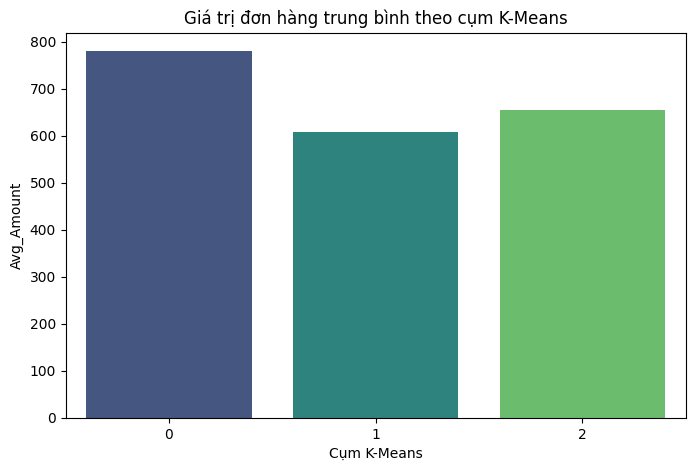

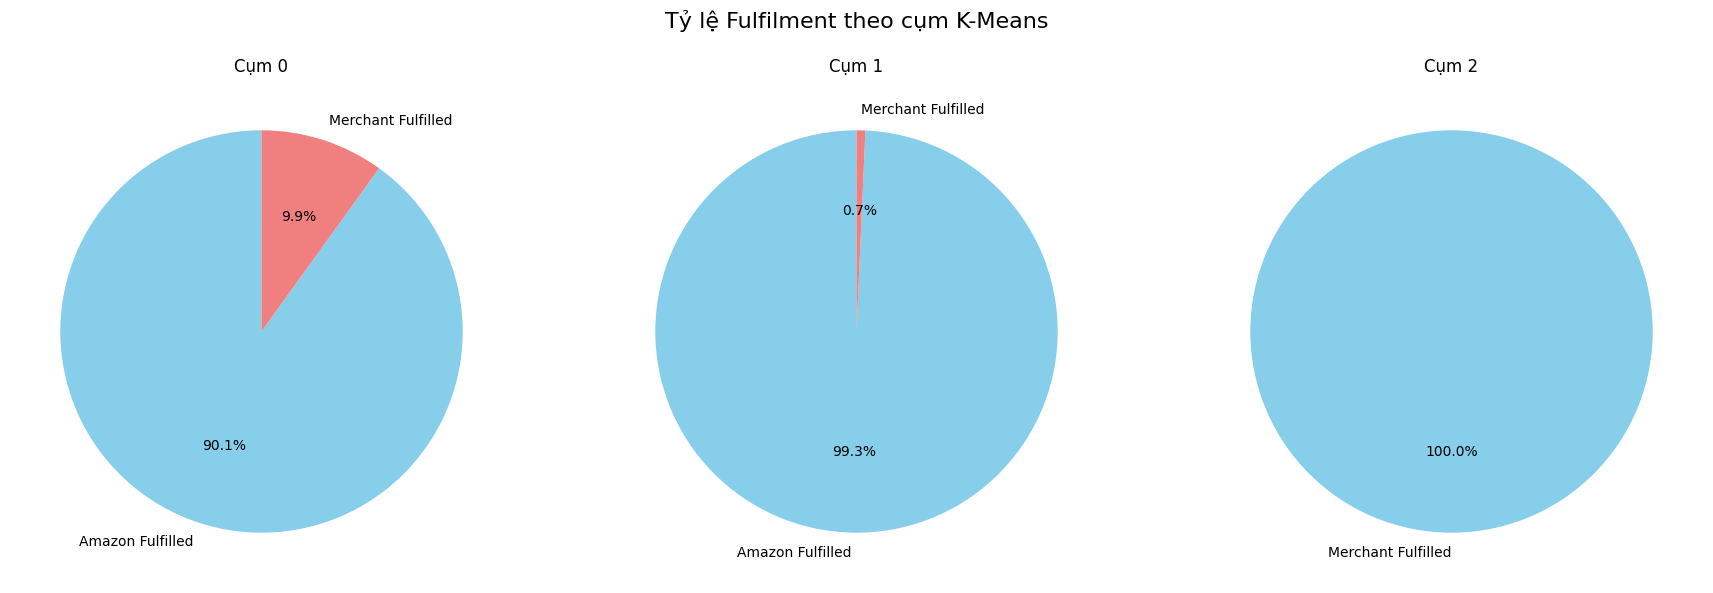

In [38]:
# Vẽ biểu đồ đặc trưng cụm K-Means (giả định đầu vào đã hợp lệ)

# Biểu đồ 1: Giá trị đơn hàng trung bình theo cụm
plt.figure(figsize=(8, 5))
sns.barplot(data=kmeans_cluster_profile_df, x='KMeans_Cluster', y='Avg_Amount', palette='viridis')
plt.title('Giá trị đơn hàng trung bình theo cụm K-Means')
plt.xlabel('Cụm K-Means')
plt.ylabel('Avg_Amount')
plt.show()

# Biểu đồ 2: Pie chart tỷ lệ Fulfilment theo cụm
fig, axes = plt.subplots(1, optimal_k, figsize=(6 * optimal_k, 6), sharey=True)
axes = [axes] * optimal_k if optimal_k == 1 else axes
fig.suptitle('Tỷ lệ Fulfilment theo cụm K-Means', fontsize=16)

for i, ax in enumerate(axes):
    sizes = [
        kmeans_cluster_profile_df.loc[i, 'Ratio_Fulfilment_Amazon'],
        kmeans_cluster_profile_df.loc[i, 'Ratio_Fulfilment_Merchant']
    ]
    labels = ['Amazon Fulfilled', 'Merchant Fulfilled']
    filtered = [(s, l) for s, l in zip(sizes, labels) if s > 0.001]
    sizes, labels = zip(*filtered) if filtered else ([1], ['Không có dữ liệu'])

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
    ax.set_title(f'Cụm {i}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Kết luận cho K-Means:**

Phân cụm K-Means với `k=3` đã phân chia hiệu quả dữ liệu đơn hàng thành ba nhóm riêng biệt với các đặc điểm nghiệp vụ rõ ràng. Sự khác biệt chính giữa các cụm nằm ở:
1.  **Giá trị đơn hàng trung bình và loại sản phẩm chính:** Cụm 0 nổi bật với các đơn hàng "Set" giá trị cao, trong khi Cụm 1 và 2 chủ yếu là "kurta" với giá trị thấp hơn.
2.  **Phương thức hoàn thành và vận chuyển:** Cụm 0 và 1 phụ thuộc lớn vào Amazon để hoàn thành và vận chuyển nhanh. Ngược lại, Cụm 2 hoàn toàn do người bán tự xử lý và vận chuyển tiêu chuẩn, thường liên kết với các chương trình khuyến mãi tài chính.

Các phân khúc này cung cấp cơ sở để điều chỉnh chiến lược kinh doanh, marketing và vận hành cho phù hợp với từng nhóm đơn hàng. Có thể tập trung các ưu đãi vận chuyển nhanh cho các sản phẩm thuộc Cụm 0 và 1, hoặc xem xét các chính sách hỗ trợ/đánh giá cho các đơn hàng do Merchant tự hoàn thành trong Cụm 2. Bang MAHARASHTRA là thị trường trọng điểm cho tất cả các phân khúc.

# 8. DỰ ĐOÁN DOANH THU TRONG TƯƠNG LAI BẰNG CHUỖI THỜI GIAN SỬ DỤNG SARIMA 

## 8.1. Tạo dữ liệu Time Series 

In [39]:
df_timeseries = df.copy()
df_timeseries['Date'] = pd.to_datetime(df_timeseries['Date'], format='%m-%d-%y', errors='coerce')
df_timeseries.set_index('Date', inplace=True)

In [40]:
# Tạo cột doanh thu thực tế
df_timeseries['Revenue'] = df_timeseries['Amount'] * df_timeseries['Qty']

In [41]:
df_timeseries

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,Month,Cancelled,Revenue
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-30,405-8078784-5731545,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,...,647.62,MUMBAI,MAHARASHTRA,400081,IN,None,False,2022-04,1,0.0
2022-04-30,171-9198151-1101146,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,...,406.00,BENGALURU,KARNATAKA,560085,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,2022-04,0,406.0
2022-04-30,404-0687676-7273146,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,...,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,2022-04,0,329.0
2022-04-30,403-9615377-8133951,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,...,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,None,False,2022-04,1,0.0
2022-04-30,407-1069790-7240320,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,...,574.00,CHENNAI,TAMIL NADU,600073,IN,None,False,2022-04,0,574.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,406-6001380-7673107,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,...,517.00,HYDERABAD,TELANGANA,500013,IN,None,False,2022-05,0,517.0
2022-05-31,402-9551604-7544318,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,...,999.00,GURUGRAM,HARYANA,122004,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,2022-05,0,999.0
2022-05-31,407-9547469-3152358,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,...,690.00,HYDERABAD,TELANGANA,500049,IN,None,False,2022-05,0,690.0


## 8.2. Lấy tổng doanh thu theo ngày 

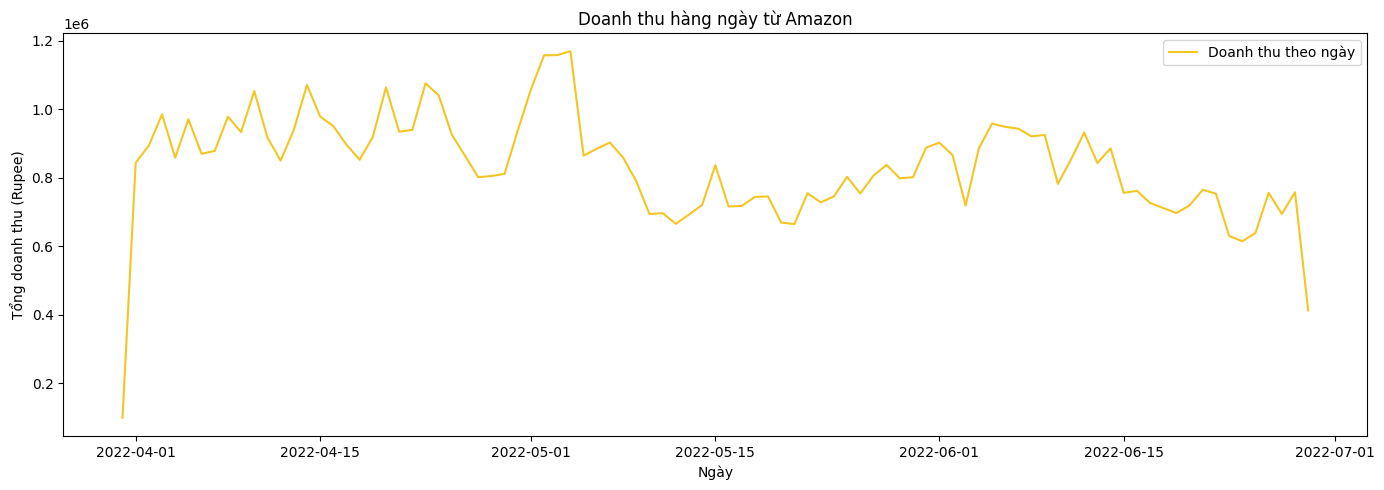

In [42]:
daily_sales = df_timeseries.resample('D')['Revenue'].sum()
plt.figure(figsize=(14, 5))
plt.plot(daily_sales, label='Doanh thu theo ngày', color='#F3C623')
plt.title('Doanh thu hàng ngày từ Amazon')
plt.xlabel('Ngày')
plt.ylabel('Tổng doanh thu (Rupee)')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


In [43]:
print(daily_sales.head())

Date
2022-03-31     98261.0
2022-04-01    843717.0
2022-04-02    894291.0
2022-04-03    985244.0
2022-04-04    858268.0
Freq: D, Name: Revenue, dtype: float64


Ta thấy doanh thu theo ngày có sự biến động rất lớn, ổn định hơn vào khoảng tháng 4 - thàng 5, nhưng bắt đầu có xu hướng giảm giữa tháng 5 sau khi tăng đột ngột. 

Các yếu tố có thể ảnh hưởng đến doanh thu:
- Thời điểm tháng 4-5 thường có nhiều sự kiện mua sắm (như Easter, Mother's Day) có thể thúc đẩy doanh thu cao hơn
- Áp lực lạm phát tăng cao vào giữa năm 2022 có thể ảnh hưởng đến hành vi mua sắm (Vào giữa năm 2022, Ấn Độ trải qua mức lạm phát khá cao, phản ánh áp lực giá cả gia tăng trong nền kinh tế)

## 8.3. Doanh thu theo tháng 

C:\Users\HP\AppData\Local\Temp\ipykernel_11204\3596468798.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_timeseries.resample('M')['Revenue'].sum()


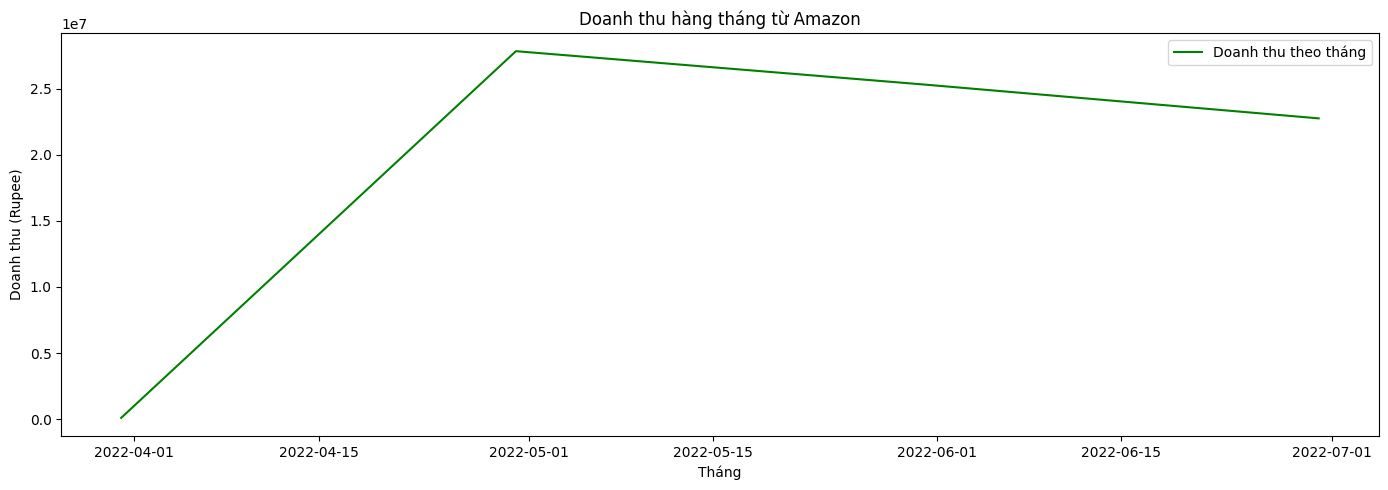

In [44]:
monthly_sales = df_timeseries.resample('M')['Revenue'].sum()

plt.figure(figsize=(14, 5))
plt.plot(monthly_sales, label='Doanh thu theo tháng', color='green')
plt.title('Doanh thu hàng tháng từ Amazon')
plt.xlabel('Tháng')
plt.ylabel('Doanh thu (Rupee)')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

Doanh thu hàng tháng cho thấy rõ hơn một xu hướng tăng doanh thu cao vào tháng 4 - 5. Giảm nhẹ từ tháng 5 đến tháng 7 (năm 2022).

In [45]:
%pip install statsmodels


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 8.4. Phân tách các thành phần của dữ liệu 

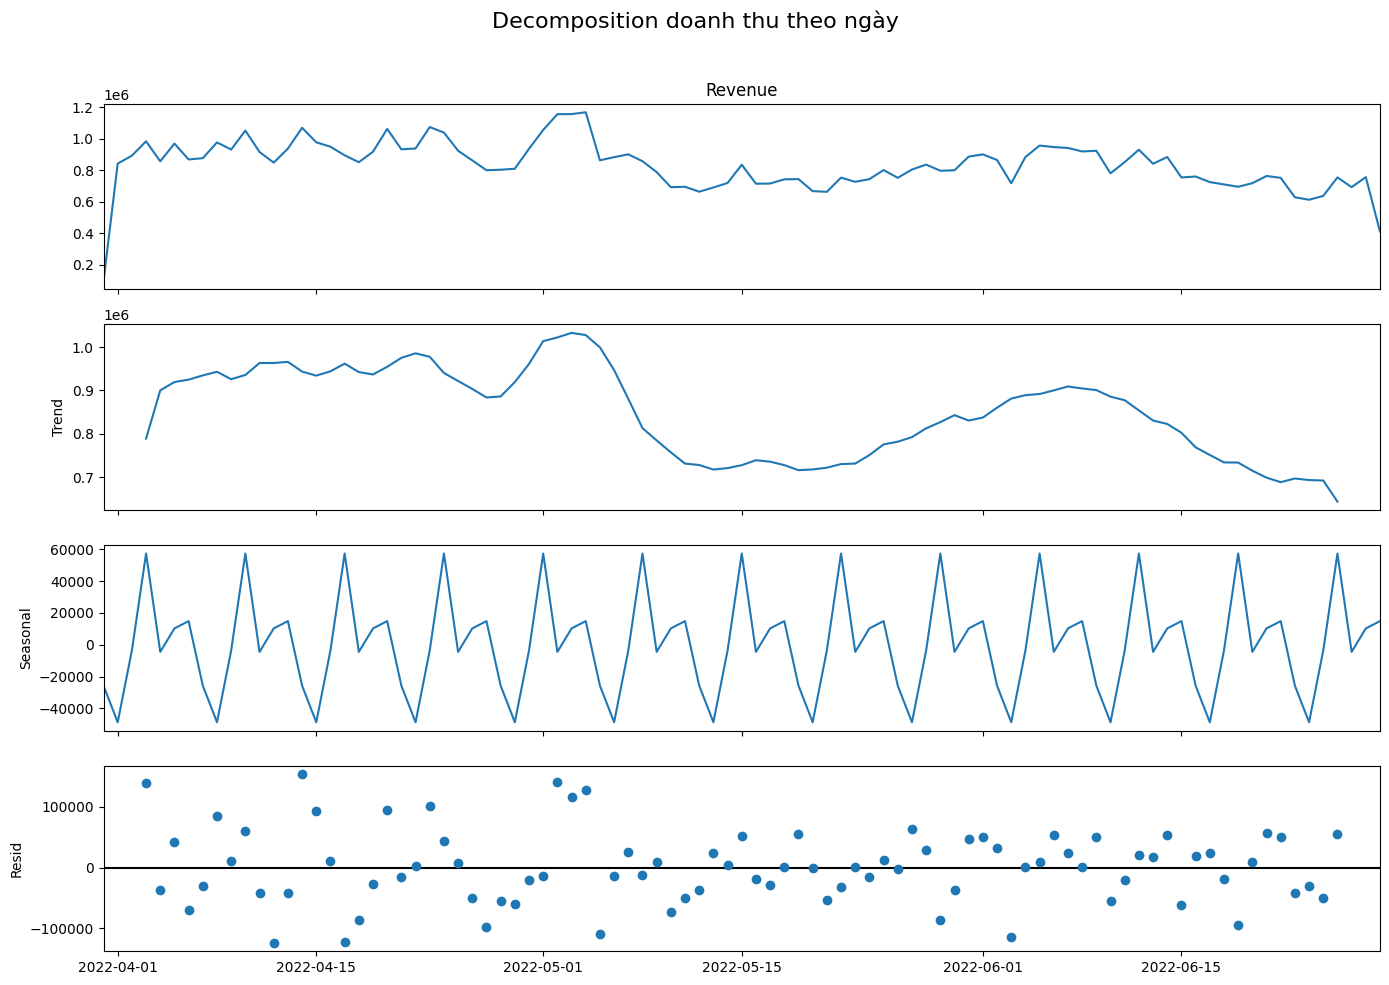

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Phân tích thành phần chuỗi thời gian theo ngày (Seasonal Decompose)
# model='additive': Điều này có nghĩa là đang thực hiện phân rã theo kiểu cộng (additive decomposition)

decomposition = seasonal_decompose(daily_sales, model='additive', period=7)
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.suptitle('Decomposition doanh thu theo ngày', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Biểu đồ thể hiện quá trình phân rã chuỗi thời gian doanh thu hàng ngày từ tháng 4 đến tháng 6 năm 2022, chia thành bốn thành phần chính:
1. Dữ liệu gốc: 
- Doanh thu hàng ngày dao động đáng kể, thường trong khoảng từ **600,000 đến 1,100,000 rupee**.
- Có một **đỉnh cao rõ rệt** vào đầu tháng 5.
- Sau đó là sự **suy giảm chung**, nhưng vẫn duy trì **mô hình chu kỳ ổn định**.

2. Trend: 
- **Tháng 4**: Giai đoạn tương đối ổn định với giá trị khoảng **900,000 – 1,000,000 rupee**.
- **Đầu tháng 5**: Doanh thu đạt **đỉnh cao vượt quá 1,000,000 rupee**.
- **Giữa tháng 5**: Có sự **suy giảm mạnh**.
- **Tháng 6**: Doanh thu **phục hồi nhẹ**, sau đó **giảm dần về cuối tháng**.

3. Mùa vụ: 
- Thể hiện mô hình **chu kỳ hàng tuần rõ rệt**:
  - Đỉnh cao lặp lại khoảng **mỗi 7 ngày**, đạt khoảng **+50,000 rupee**.
  - Sau đó là các đáy khoảng **−40,000 rupee**.
- Chu kỳ lặp lại đều đặn, cho thấy ảnh hưởng mạnh của **ngày trong tuần** tới doanh số.

4. Thành phần phần dư: 
- Phần dư còn lại sau khi loại bỏ xu hướng và tính thời vụ.
- Hầu hết nằm trong khoảng **±50,000 rupee**.
- Một số **ngoại lệ lớn** xảy ra, đặc biệt là vào **tháng 4 và đầu tháng 5**.
- Cho thấy các yếu tố ngẫu nhiên, và mô hình đã nắm bắt hiệu quả phần có hệ thống của dữ liệu.

## 8.5. Tính trung bình trượt để làm mượt đường xu hướng của dữ liệu  

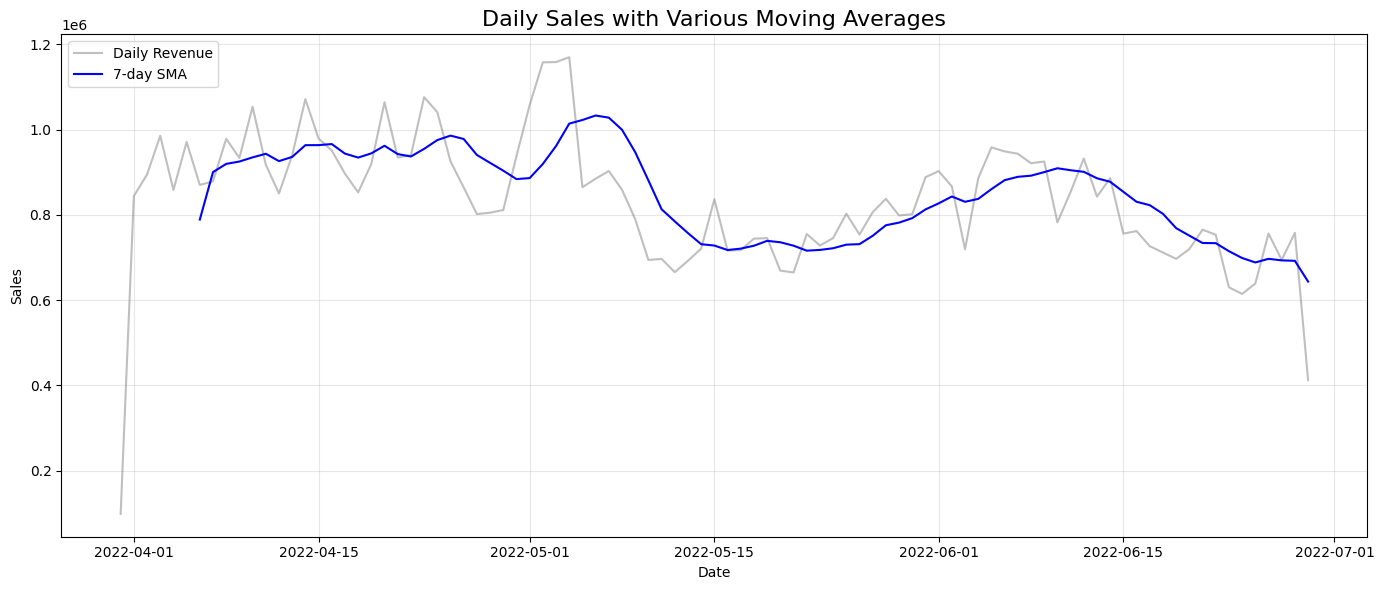

In [47]:
# Trực quan hóa riêng cho trung bình động của dữ liệu gốc
plt.figure(figsize=(14, 6))

# Vẽ dữ liệu gốc
plt.plot(daily_sales, label='Daily Revenue', color='gray', alpha=0.5)

# Tính và vẽ các loại trung bình động
# 1. Simple Moving Average (SMA)
sma_7 = daily_sales.rolling(window=7, center=False).mean()

# Vẽ các đường trung bình động
plt.plot(sma_7, label='7-day SMA', color='blue', linewidth=1.5)

plt.title('Daily Sales with Various Moving Averages', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 8.6. Kiểm định tính dừng, tự tương quan để xác định tham số (p,d,q) 

In [48]:
# Log do giá trị doanh thu có thể rất lớn, nên log giúp giảm độ biến động
daily_sales_log = np.log1p(daily_sales)

In [49]:
daily_sales_log = daily_sales_log.fillna(daily_sales_log.bfill().ffill())
daily_sales_log.head()

Date
2022-03-31    11.495393
2022-04-01    13.645574
2022-04-02    13.703788
2022-04-03    13.800646
2022-04-04    13.662673
Freq: D, Name: Revenue, dtype: float64

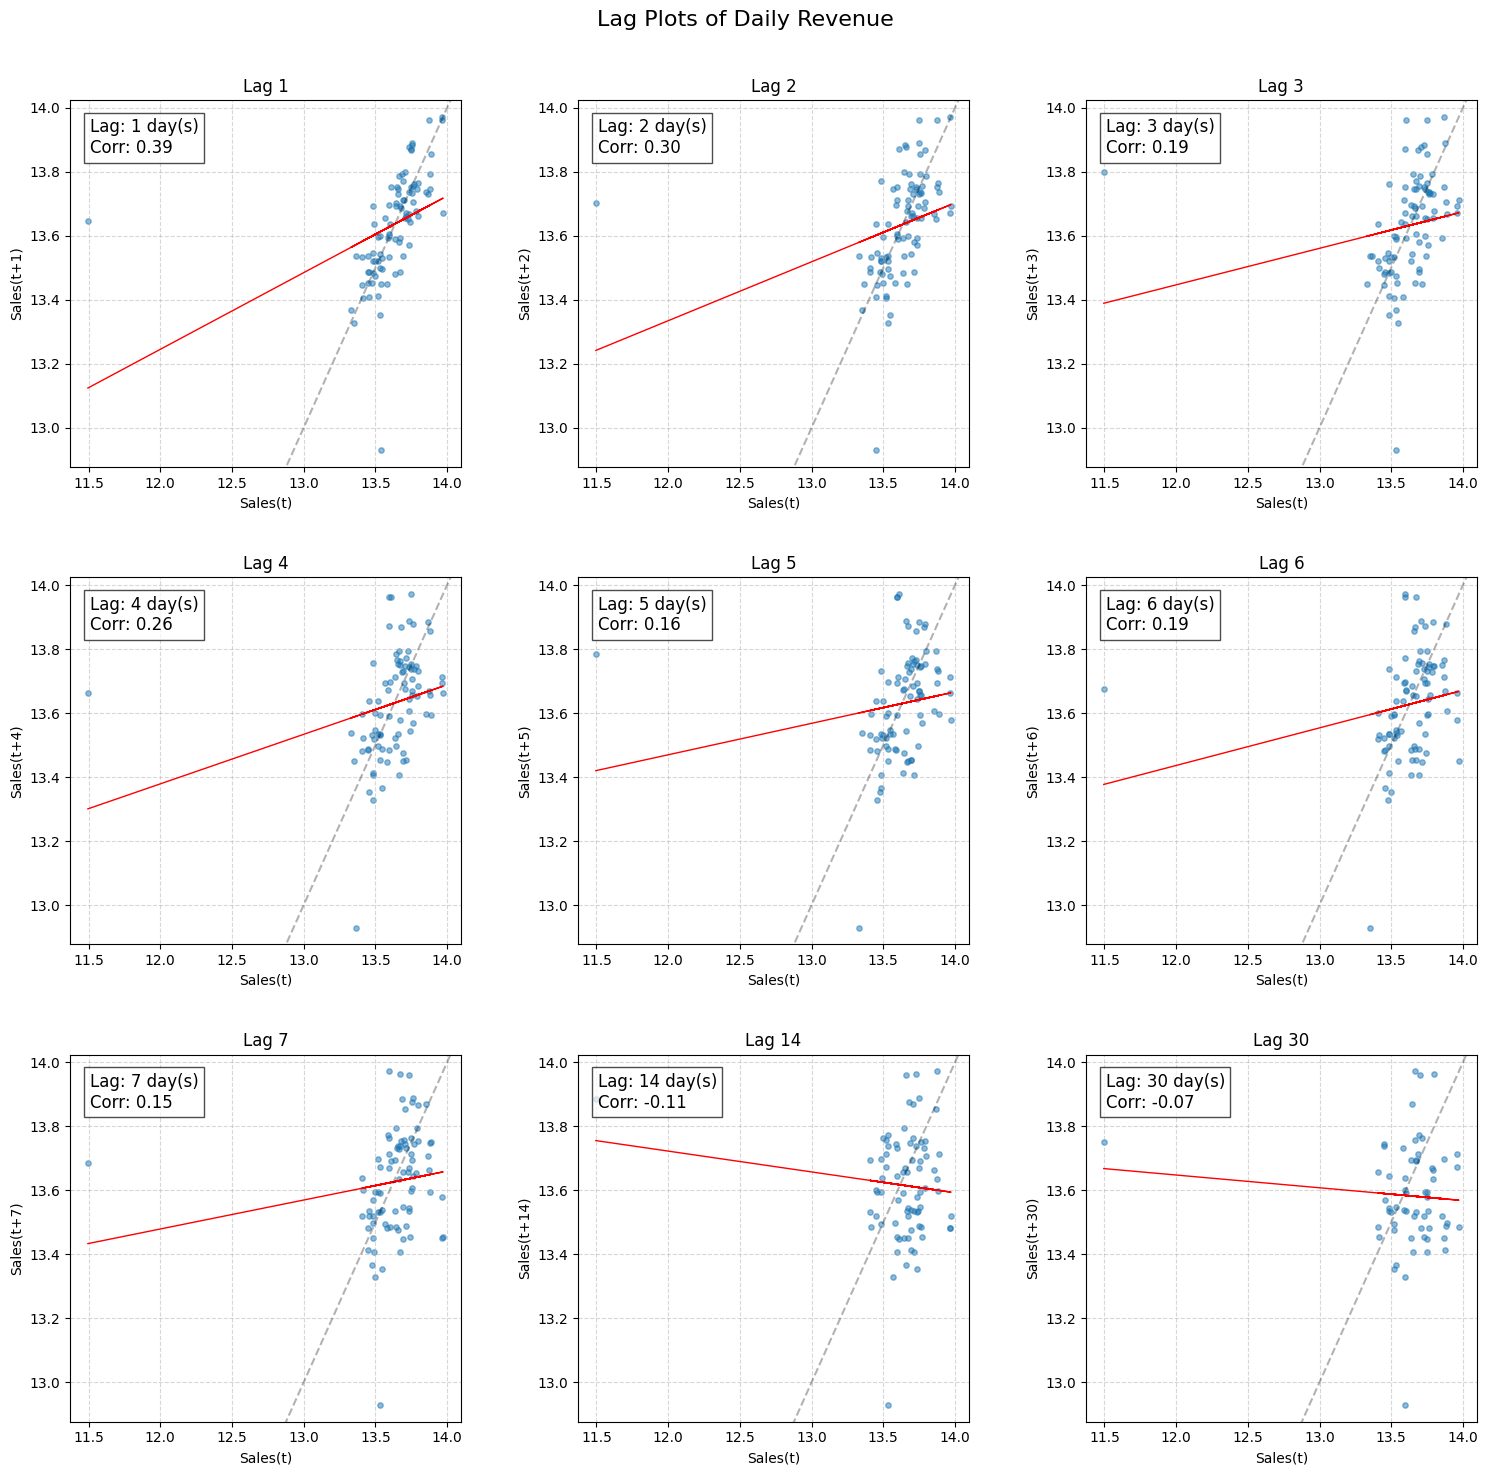

In [50]:
# Tạo lag plot với 9 độ trễ để phân tích tự tương quan
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Lag Plots of Daily Revenue', fontsize=16)

# Danh sách độ trễ cần phân tích
lags = [1, 2, 3, 4, 5, 6, 7, 14, 30]  # 1-7 ngày, 2 tuần, và 1 tháng

for i, ax in enumerate(axes.flatten()):
    if i < len(lags):
        lag = lags[i]
        
        # Tạo dữ liệu để vẽ lag plot
        if len(daily_sales_log) > lag:
            x = daily_sales_log.values[:-lag]
            y = daily_sales_log.values[lag:]
            
            # Vẽ scatter plot
            ax.scatter(x, y, alpha=0.5, s=15)
            
            # Thêm đường hồi quy
            m, b = np.polyfit(x, y, 1)
            ax.plot(x, m*x + b, color='red', linewidth=1)
            
            # Tính và hiển thị hệ số tương quan
            corr = np.corrcoef(x, y)[0, 1]
            ax.text(0.05, 0.95, f'Lag: {lag} day(s)\nCorr: {corr:.2f}', 
                    transform=ax.transAxes, fontsize=12, verticalalignment='top',
                    bbox=dict(facecolor='white', alpha=0.7))
            
            # Thêm đường 45 độ tham chiếu
            xlim = ax.get_xlim()
            ylim = ax.get_ylim()
            lim_min = min(xlim[0], ylim[0])
            lim_max = max(xlim[1], ylim[1])
            ax.plot([lim_min, lim_max], [lim_min, lim_max], 'k--', alpha=0.3)
            
            ax.set_title(f'Lag {lag}')
            ax.set_xlabel('Sales(t)')
            ax.set_ylabel(f'Sales(t+{lag})')
            ax.grid(True, linestyle='--', alpha=0.5)
            
            # Đặt cùng giới hạn trục để dễ so sánh
            ax.set_xlim(xlim)
            ax.set_ylim(ylim)
        else:
            ax.text(0.5, 0.5, f'Không đủ dữ liệu\ncho lag {lag}', 
                    ha='center', va='center', transform=ax.transAxes)
            ax.set_axis_off()

plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.3, wspace=0.3)
plt.show()

Tại lag 1, có sự tự tương quan lớn, lag 2 cũng lớn và sau đó giảm dần, đến lag 14 trở thành tương quan nghịch.

Mối liên hệ giữa các ngày càng xa nhau càng yếu đi<br>
Đến khoảng 2 tuần (lag 14), mối quan hệ trở thành nghịch chiều - có thể do tính chu kỳ của dữ liệu

### Kiểm định tính dừng 

In [51]:
# Dùng kiểm định ADF để kiểm tra tính dừng của chuỗi thời gian
from statsmodels.tsa.stattools import adfuller
def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', '#Observations Used']
    for label, value in zip(labels, result):
        print(f'{label}: {value}')
    if result[1] <= 0.05:
        print("Bác bỏ giả thuyết không: Chuỗi thời gian là dừng (stationary).")
    else:
        print("Không bác bỏ giả thuyết không: Chuỗi thời gian là không dừng (non-stationary).")

# Kiểm tra tính dừng của chuỗi thời gian doanh thu hàng ngày
adf_test(daily_sales_log, title='Daily Sales')

ADF Test Statistic: -12.737157080917891
p-value: 9.108487460343442e-24
#Lags Used: 0
#Observations Used: 90
Bác bỏ giả thuyết không: Chuỗi thời gian là dừng (stationary).


Daily Revenue (Doanh thu hàng ngày):
- p-value: 9.108487460343442e-24
- Kết luận: Với p-value < 0.05, ta bác bỏ giả thuyết gốc. Chuỗi thời gian doanh thu hàng ngày là dừng.
- Do chuỗi dừng, nên d=0 

### Phân tích tự tương quan để chọn tham số cho mô hình 

Biểu đồ ACF hiển thị mức độ tương quan giữa chuỗi thời gian hiện tại và các giá trị trong quá khứ (lags).<br>
Biểu đồ PACF hiển thị mức độ tương quan giữa chuỗi hiện tại và các giá trị trong quá khứ, sau khi loại bỏ ảnh hưởng của các độ trễ trung gian.

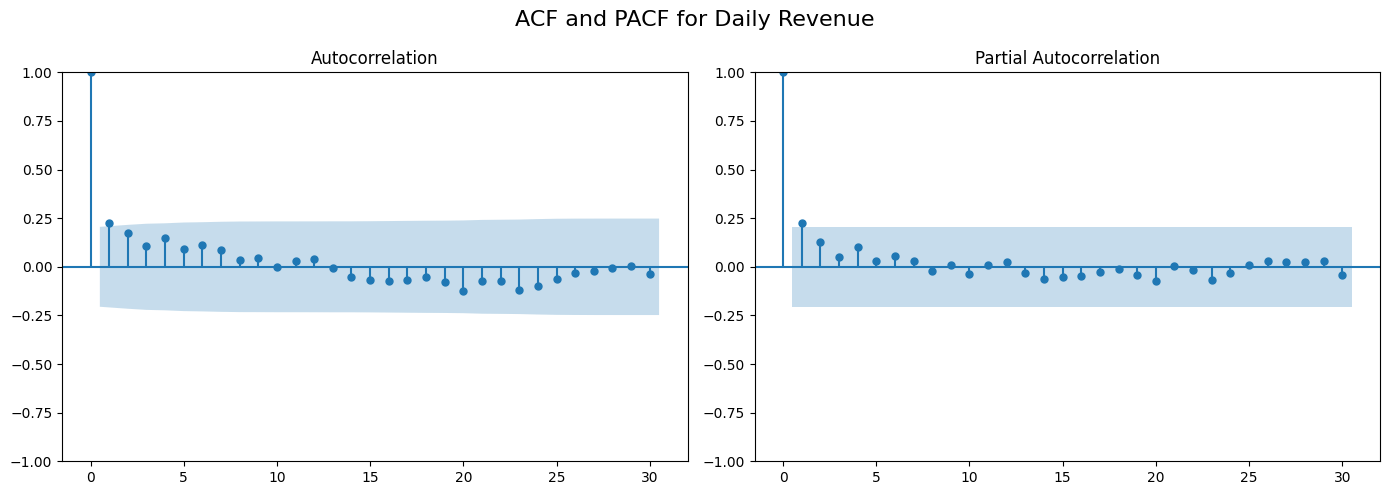

In [52]:
# Phân tích ACF và PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

# ACF và PACF cho doanh thu hàng ngày
plt.figure(figsize=(14, 5))
plot_acf(daily_sales_log, lags=30, ax=plt.subplot(121))
plot_pacf(daily_sales_log, lags=30, ax=plt.subplot(122))
plt.suptitle('ACF and PACF for Daily Revenue', fontsize=16)
plt.tight_layout()
plt.show()

## 8.7. Xây dựng mô hình dự báo Seasonal ARIMA - SARIMA 

RMSE (SARIMA): 0.24
Summary:                                      SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   72
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 14)   Log Likelihood                  36.553
Date:                            Tue, 10 Jun 2025   AIC                            -63.106
Time:                                    16:17:19   BIC                            -54.418
Sample:                                         0   HQIC                           -59.922
                                             - 72                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8343      0.092      9.107      0.000       0.655       1.014
ma.L1 

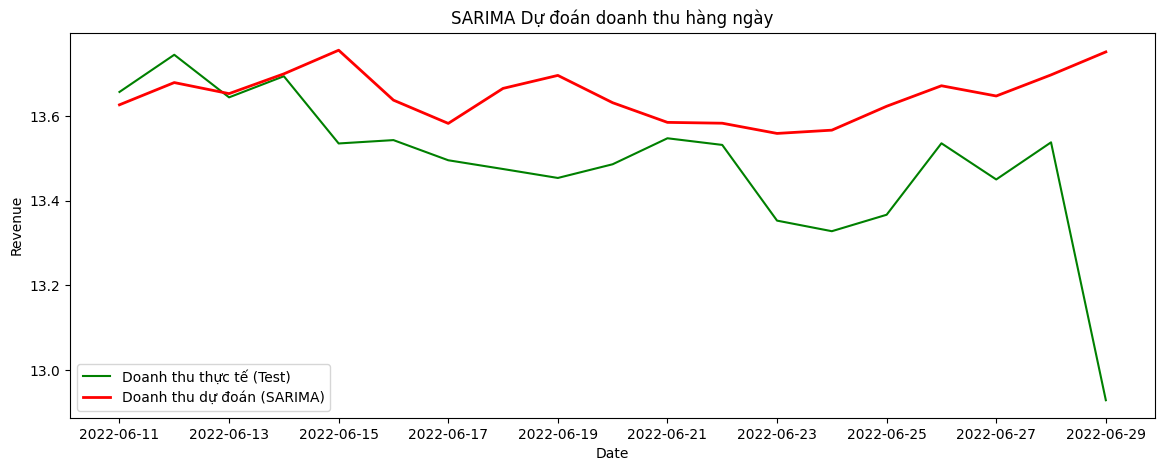

In [53]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(len(daily_sales_log) * 0.8)
train_data = daily_sales_log[:train_size]
test_data = daily_sales_log[train_size:]

y_train = train_data.values
y_test = test_data.values

# Tạo trục x cho ARIMA
if isinstance(daily_sales.index, pd.DatetimeIndex):
    x_train = train_data.index
    x_test = test_data.index
else:
    x_train = range(len(train_data))
    x_test = range(len(train_data), len(daily_sales_log))

# Tạo mô hình SARIMA (Seasonal ARIMA) với các tham số (p, d, q)(P, D, Q, s)
model_sarima = SARIMAX(y_train,
                       order=(1, 0, 1),  # ARIMA không theo mùa
                       seasonal_order=(1, 1, 1, 14), 
                       enforce_stationarity=False,
                       enforce_invertibility=False)

# Huấn luyện mô hình
results_sarima = model_sarima.fit()

# Dự đoán doanh thu trên tập kiểm tra
y_pred_sarima = results_sarima.forecast(steps=len(y_test))

# Đánh giá mô hình
mse_sarima = mean_squared_error(y_test, y_pred_sarima)
rmse_sarima = sqrt(mse_sarima)
print(f"RMSE (SARIMA): {rmse_sarima:.2f}")
print(f"Summary:", results_sarima.summary())

# Vẽ biểu đồ so sánh doanh thu thực tế và dự đoán
plt.figure(figsize=(14, 5))
plt.plot(x_test, y_test, label='Doanh thu thực tế (Test)', color='green')
plt.plot(x_test, y_pred_sarima, label='Doanh thu dự đoán (SARIMA)', color='red', linewidth=2)
plt.title('SARIMA Dự đoán doanh thu hàng ngày')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()


- RMSE = 0.24: Mức sai số thấp → mô hình dự báo khá tốt (với dữ liệu đã log-transformed; cần np.exp() để chuyển về scale gốc).
- AIC = -54.418: Rất tốt, càng thấp càng tốt → mô hình phù hợp với dữ liệu.
- Ljung-Box (Q): 0.95 > 0.05 → không có tự tương quan trong phần dư → mô hình đã fit tốt, phần dư gần giống white noise.

## 8.8. Phân tích phần dư 

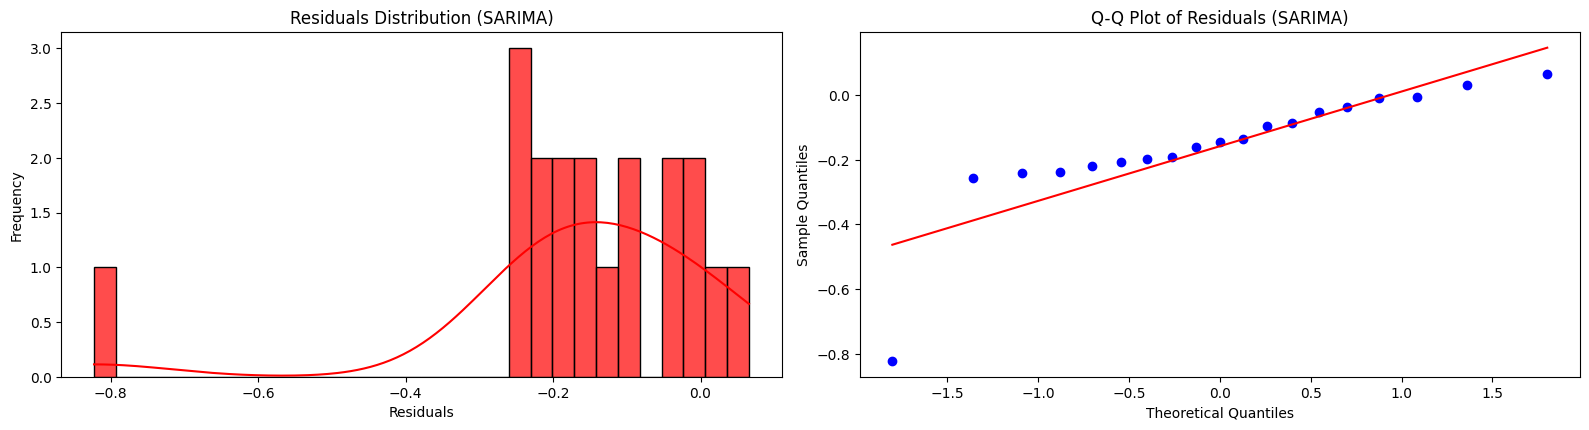

In [54]:
# Tính phần dư
residuals_sarima = y_test - y_pred_sarima

# Tạo một figure với 4 subplots
plt.figure(figsize=(16, 8))

# 1. Histogram của phần dư
plt.subplot(2, 2, 1)
sns.histplot(residuals_sarima, kde=True, color='red', alpha=0.7, edgecolor='black', bins=30)
plt.title('Residuals Distribution (SARIMA)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# 2. Q-Q plot để kiểm tra phân phối chuẩn của phần dư
plt.subplot(2, 2, 2)
import scipy.stats as stats
stats.probplot(residuals_sarima, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals (SARIMA)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()


1. Biểu đồ histogram kết hợp với đường mật độ (KDE) cho thấy phần dư của mô hình SARIMA phân bố xung quanh giá trị trung bình gần bằng 0, là một đặc điểm mong muốn trong các mô hình chuỗi thời gian. Tuy nhiên, có dấu hiệu lệch nhẹ sang bên trái và một vài điểm dữ liệu nằm ở vùng biên (outliers), đặc biệt ở khoảng -0.8. Phân phối có vẻ không hoàn toàn đối xứng, với đỉnh chính nằm ở khoảng -0.2 thay vì 0. Nhìn chung, phần dư có phân phối tương đối gần với phân phối chuẩn, đủ để chấp nhận mô hình ở mức độ tin cậy phù hợp cho mục tiêu dự báo.
2. Biểu đồ Q-Q so sánh các phân vị lý thuyết của phân phối chuẩn với phân vị thực tế của phần dư. Kết quả cho thấy hầu hết các điểm nằm gần đường chéo, đặc biệt là ở phần trung tâm của phân phối. Tuy nhiên, có một điểm ngoại lệ rõ rệt ở đầu trái của đồ thị (khoảng -1.7), thể hiện có ít nhất một giá trị phần dư cực đoan âm. Điều này phù hợp với quan sát từ histogram về giá trị outlier ở khoảng -0.8. Các điểm ở phần trên của đồ thị có xu hướng nằm trên đường chuẩn, cho thấy phần dư có thể có đuôi dày hơn phân phối chuẩn ở phần giá trị dương. Tuy vậy, sự lệch này là không quá lớn và không làm suy yếu nghiêm trọng giả định phân phối chuẩn của phần dư.

--> Mô hình SARIMA được sử dụng cho dự báo doanh thu có phần dư không hoàn hảo nhưng khá gần với phân phối chuẩn, phần dư không thể hiện mô hình hệ thống rõ ràng, cho thấy mô hình SARIMA đã nắm bắt được phần lớn thông tin trong dữ liệu. Do đó, mô hình này có thể được coi là đủ ổn định và phù hợp để sử dụng cho mục tiêu dự báo doanh thu hàng ngày trong giai đoạn đã phân tích.

## 8.9. Dự đoán doanh thu trong 2 tháng tiếp theo 

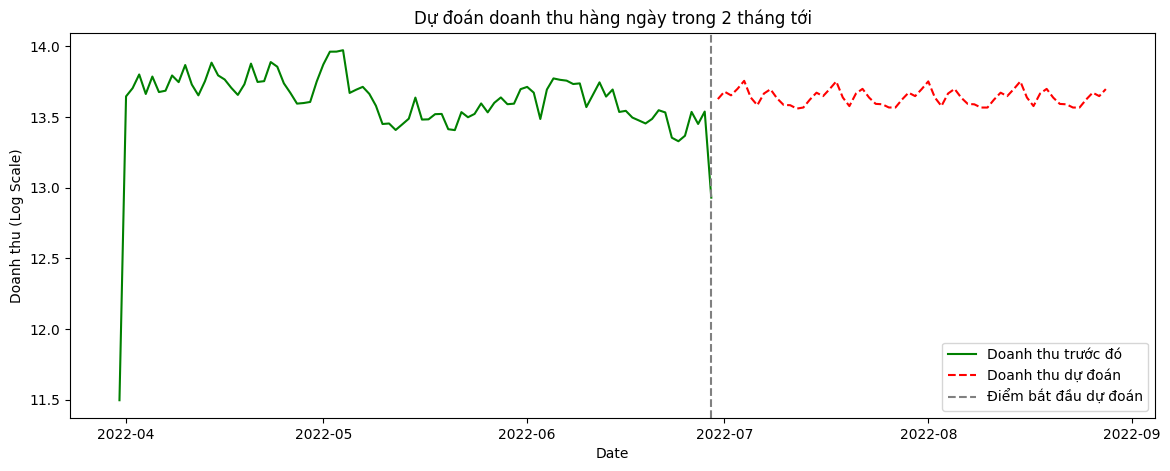

In [55]:
y_pred_future = results_sarima.forecast(steps=2*30)  

future_index = pd.date_range(start=daily_sales_log.index[-1] + pd.Timedelta(days=1), periods=len(y_pred_future), freq='D')
# Tạo DataFrame cho các dự đoán
future_sales = pd.DataFrame(data=y_pred_future, index=future_index, columns=['Doanh thu dự đoán'])

# Vẽ biểu đồ dự đoán doanh thu 
plt.figure(figsize=(14, 5))
plt.plot(daily_sales_log, label='Doanh thu trước đó', color='green')
plt.plot(future_sales, label='Doanh thu dự đoán', color='red', linestyle='--')
plt.axvline(x=daily_sales_log.index[-1], color='gray', linestyle='--', label='Điểm bắt đầu dự đoán')


plt.title('Dự đoán doanh thu hàng ngày trong 2 tháng tới')
plt.xlabel('Date')
plt.ylabel('Doanh thu (Log Scale)')
plt.legend()
plt.show()

In [56]:
# Lúc nãy lấy log1p để giảm độ biến động, giờ cần chuyển đổi về giá trị gốc
# Lấy mũ để chuyển đổi dự đoán về giá trị gốc
future_sales['Doanh thu dự đoán (Rupee)'] = np.expm1(future_sales['Doanh thu dự đoán'])
print("Dự đoán doanh thu trong 2 tháng tiếp theo (giá trị gốc):")
print(future_sales.head(30))  

Dự đoán doanh thu trong 2 tháng tiếp theo (giá trị gốc):
            Doanh thu dự đoán  Doanh thu dự đoán (Rupee)
2022-06-30          13.626672              827918.969779
2022-07-01          13.679198              872568.812231
2022-07-02          13.653058              850055.536281
2022-07-03          13.699772              890707.493177
2022-07-04          13.755581              941829.800758
2022-07-05          13.637659              837065.874170
2022-07-06          13.582756              792347.164485
2022-07-07          13.665428              860635.655757
2022-07-08          13.696108              887449.700151
2022-07-09          13.631618              832024.318962
2022-07-10          13.585175              794266.244203
2022-07-11          13.583207              792704.573621
2022-07-12          13.559079              773806.650931
2022-07-13          13.566810              779812.368863
2022-07-14          13.623231              825075.129669
2022-07-15          13.671653  

In [57]:
df_not_canceled = df[df['Cancelled'] == 1]

# Đếm số lần xuất hiện của mỗi promotion-id
promotion_counts = df_not_canceled['promotion-ids'].value_counts().head(10)

# Hiển thị bảng
print("Top 10 promotion-ids xuất hiện nhiều nhất khi Canceled = 1:")
print(promotion_counts)



Top 10 promotion-ids xuất hiện nhiều nhất khi Canceled = 1:
promotion-ids
None                                            18028
IN Core Free Shipping 2015/04/08 23-48-5-108      293
Duplicated A12RHGVGRWOT3S 1560498941486             1
Name: count, dtype: int64


In [58]:
df_not_canceled = df_report[df_report['Cancelled'] == 0]

# Đếm số lần xuất hiện của mỗi promotion-id
promotion_counts = df_not_canceled['promotion-ids'].value_counts().head(10)

# Hiển thị bảng
print("Top 10 promotion-ids xuất hiện nhiều nhất khi Canceled = 0:")
print(promotion_counts)

Top 10 promotion-ids xuất hiện nhiều nhất khi Canceled = 0:
promotion-ids
IN Core Free Shipping 2015/04/08 23-48-5-108                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

Mã giảm giá “IN Core Free Shipping…” có hiệu quả rất cao:

Xuất hiện tới 45,789 lần trong đơn không bị hủy, nhưng chỉ có 293 lần trong đơn bị hủy.

→ Đây là mã có tỷ lệ giữ đơn rất tốt, rất nên duy trì và nhân rộng.

Mã “None” (không có khuyến mãi) gắn với tỷ lệ hủy đơn cao:

18,028 lượt bị hủy khi không có mã giảm giá, chiếm phần lớn số đơn bị hủy.

Trong khi đó, “None” chỉ xuất hiện 31,114 lần trong đơn giữ lại, cho thấy:

Khách hàng có xu hướng hủy đơn nếu không có khuyến mãi.

→ Cần thúc đẩy áp dụng khuyến mãi hoặc khuyến nghị mã phù hợp cho khách chưa chọn.

Top 10 Category có tổng Amount cao nhất:
Category
Set              39193074.03
kurta            21291005.70
Western Dress    11215337.69
Top               5346812.30
Ethnic Dress       791217.66
Blouse             458408.18
Bottom             150667.98
Saree              123933.76
Dupatta               915.00
Name: Amount, dtype: float64




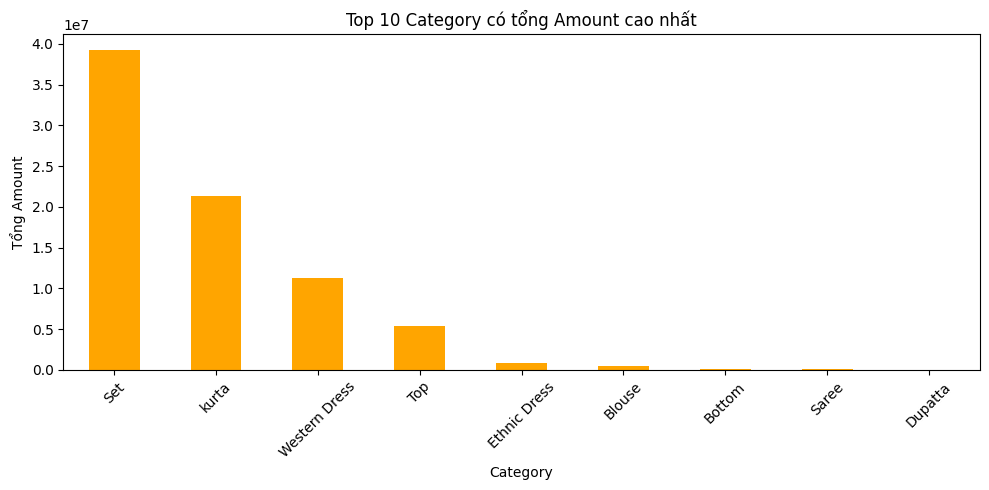

Top 10 SKU có tổng Amount cao nhất:
SKU
J0230-SKD-M        526536.20
JNE3797-KR-L       524581.77
J0230-SKD-S        479937.14
JNE3797-KR-M       453555.16
JNE3797-KR-S       407302.57
JNE3797-KR-XL      332155.24
J0230-SKD-L        305616.95
JNE3797-KR-XS      303616.70
SET268-KR-NP-XL    284058.96
JNE3797-KR-XXXL    276375.80
Name: Amount, dtype: float64




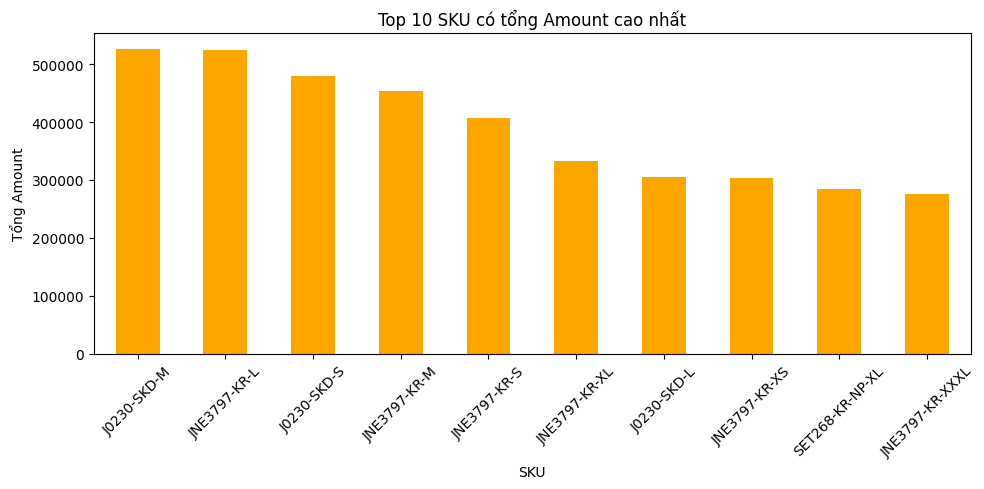

Top 10 Style có tổng Amount cao nhất:
Style
JNE3797    2932747.00
J0230      1942673.48
SET268     1303923.56
J0341      1275322.87
J0003       980665.75
JNE3405     846062.36
J0008       819169.96
SET345      723402.79
SET278      719791.48
SET324      719489.82
Name: Amount, dtype: float64




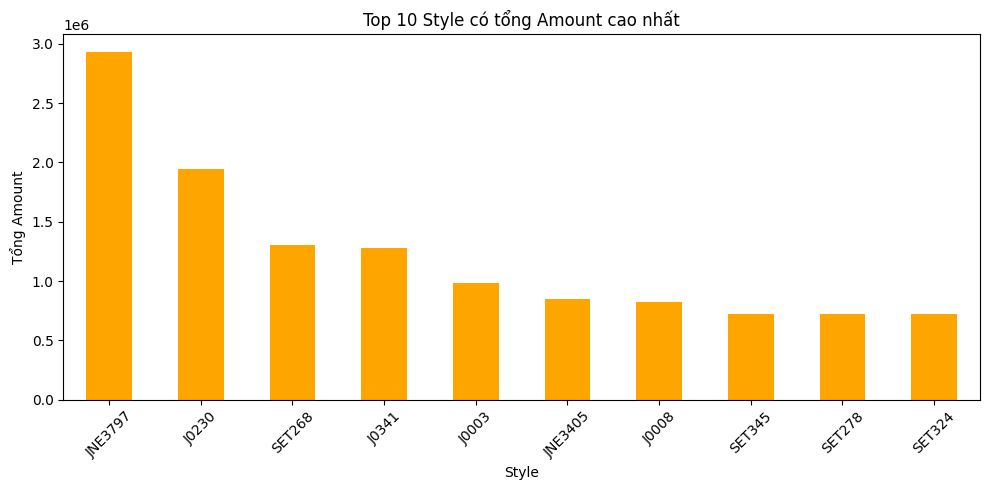

Top 10 ASIN có tổng Amount cao nhất:
ASIN
B08XNJG8B1    526536.20
B09SDXFFQ1    524581.77
B08XNJ19QH    479937.14
B09SDY8DCT    453555.16
B09SDYQ3WG    407302.57
B09SDXRYBG    332155.24
B08XNDL1DL    305616.95
B09SDY9SQ6    303616.70
B08XQBF1G4    284058.96
B09SDY4VDC    276375.80
Name: Amount, dtype: float64




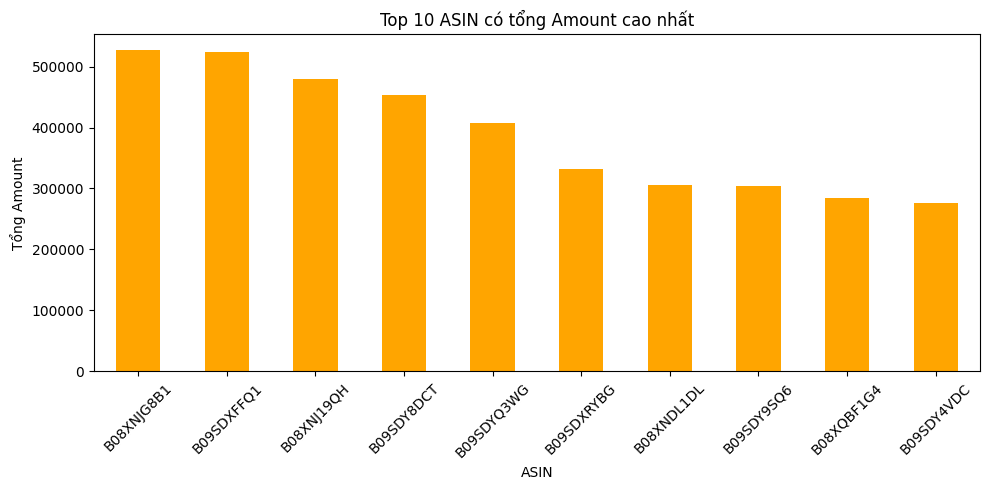

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử df là DataFrame đã được load

# Danh sách các cột cần thống kê
cols = ['Category', 'SKU', 'Style', 'ASIN']

for col in cols:
    print(f"Top 10 {col} có tổng Amount cao nhất:")
    amount_sum = df_report.groupby(col)['Amount'].sum().sort_values(ascending=False).head(10)
    print(amount_sum)
    print("\n")
    
    # Vẽ biểu đồ
    plt.figure(figsize=(10,5))
    amount_sum.plot(kind='bar', color='orange')
    plt.title(f"Top 10 {col} có tổng Amount cao nhất")
    plt.xlabel(col)
    plt.ylabel("Tổng Amount")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# CÁC ĐỀ XUẤT:

1. Tập trung đầu tư mạnh vào danh mục “Set”
- Tối ưu hóa quảng cáo, hình ảnh, chiến dịch giảm giá cho sản phẩm Set.

- Gợi ý “Set” khi khách chọn từng món lẻ → tăng giá trị đơn hàng.

- Tạo các combo theo mùa, theo dịp lễ, theo độ tuổi.

 2. Chiến dịch marketing riêng cho kurta & Western Dress
- Tận dụng đặc trưng văn hóa:

+ kurta → dịp lễ, truyền thống, văn phòng.

+ Western Dress → thời trang thường ngày, dạo phố, đi làm.

- Tạo các landing page riêng, gắn nội dung lifestyle theo từng dòng.

 3. Dùng các danh mục phụ như Dupatta, Blouse, Bottom để upsell
- Gợi ý mua kèm, khuyến mãi giảm giá khi mua kèm sản phẩm chính.

- Triển khai các chiến dịch “Buy 1 Get 1” hoặc “Mix & Match”.

- Giảm hàng tồn ở các danh mục ít sinh lời bằng bundling.

1. Tăng cường tồn kho và quảng bá cho các SKU top
- Ưu tiên sản xuất và dự trữ nhiều hơn cho các SKU:

+ J0230-SKD-M/S/L

+ JNE3797-KR-S/M/L/XL/XS

- Tránh tình trạng out-of-stock — dễ mất khách hàng tiềm năng.

 2. Phát triển các sản phẩm mở rộng từ dòng bán chạy
- Phát triển các biến thể màu sắc, kiểu dáng mới từ J0230 và JNE3797.

- Tạo phiên bản “limited” hoặc “festive edition” cho dịp lễ → tăng giá trị đơn hàng trung bình.

 3. Tối ưu chiến lược size
- Size M, L, S chiếm phần lớn doanh thu → có thể tối ưu khuyến mãi, hiển thị đầu tiên khi khách truy cập.

- Đối với size XL/XXXL → vẫn có thị trường → cân nhắc giữ một mức tồn kho vừa phải.

1. Tập trung đầu tư vào các style chủ lực
- Duy trì hoặc tăng cường quảng bá các style top:

+ JNE3797, J0230, SET268, J0341

- Ưu tiên vị trí trưng bày (online/offline), làm landing page riêng.

2. Mở rộng bộ sưu tập từ Style top
- Từ các style như JNE3797 hoặc J0230, tạo thêm:

- Biến thể màu sắc, chất liệu, kiểu tay áo, cổ áo...

- Bộ sưu tập "Premium" hoặc "Festive Edition".



1. Xác định và Ưu tiên đầu tư các dòng sản phẩm có ASIN top
- Đảm bảo không thiếu hàng trong kho và tối ưu tồn kho cho các ASIN này.

- Tăng cường quảng cáo Google/Meta/Amazon Ads với trọng tâm vào ASIN top.

2. Tạo dòng sản phẩm "liên kết" (Product Line Extension)
- Nếu các ASIN này thuộc cùng dòng/thiết kế, nên phát triển:

- Biến thể màu sắc, size, chất liệu.

- Bản giới hạn (Limited Edition) hoặc phiên bản theo mùa (Festive/Monsoon).

3. Ưu tiên hiển thị trên sàn TMĐT và Website
- Gắn nhãn "Best Seller", "Customer Favorite" hoặc "Top Rated".

- Ưu tiên vị trí đầu trong listing trang web và mobile app.

- Đặt banner riêng cho Top ASINs.